# Установка и импорт библиотек

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
from torch_geometric.data import Data
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, SAGEConv, JumpingKnowledge, SuperGATConv, GINConv, APPNP, GATv2Conv
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.sparse import coo_matrix
from torch_geometric.utils import from_scipy_sparse_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from itertools import product
import networkx as nx
from sklearn.manifold import TSNE
from torch_geometric.utils.convert import to_networkx
from torch_geometric.utils import degree
import seaborn as sns
from matplotlib.colors import ListedColormap
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Датасет

In [ ]:
df = pd.read_excel('/content/rbc_01.01.2025_30.04.2025_v2.xlsx')

In [ ]:
df

,Unnamed: 0,id,project,project_nick,type,category,title,body,publish_date,publish_date_t,fronturl,picture,badge,pay_option,data,_score,overview,text
0,0,6776f2db9a7947e147db3050,РБК,rbcnews,article,Политика,Подозреваемый в подрыве Cybertruck у отеля Тра...,Водитель взорвавшегося в Лас-Вегасе Cybertruck...,2025-01-02T23:35:42+03:00,1735850142,https://www.rbc.ru/politics/02/01/2025/6776f2d...,NaN,NaN,free,NaN,1,Водитель взорвавшегося в Лас-Вегасе Cybertruck...,Водитель взорвавшегося в Лас-Вегасе автомобил...
1,1,6776e6f89a79471c0fd6ea4b,РБК,rbcnews,short_news,Политика,Наехавший на толпу в Новом Орлеане был членом ИГ,NaN,2025-01-02T23:24:22+03:00,1735849462,https://www.rbc.ru/rbcfreenews/6776e6f89a79471...,NaN,NaN,free,NaN,1,NaN,"Водитель, 1 января наехавший на толпу в Новом ..."
2,2,6776eb819a79470a26b9c585,РБК,rbcnews,short_news,Политика,За два часа над Россией уничтожили семь украин...,NaN,2025-01-02T22:54:42+03:00,1735847682,https://www.rbc.ru/rbcfreenews/6776eb819a79470...,NaN,NaN,free,NaN,1,NaN,С 20:00 до 22:00 российские ПВО уничтожили сем...
3,3,6776db3c9a794762b5a8ad37,РБК,rbcnews,short_news,Политика,ФБР не нашла связь между терактами 1 января в ...,NaN,2025-01-02T22:22:04+03:00,1735845724,https://www.rbc.ru/rbcfreenews/6776db3c9a79476...,https://s0.rbk.ru/v6_top_pics/media/img/6/27/3...,NaN,free,NaN,1,NaN,Следователи ФБР не нашли связь между терактом ...
4,4,6776dccb9a79470afdbdb5a0,РБК,rbcnews,article,Политика,Стефанчук сообщил о повреждении здания Рады пр...,Здания Рады в Киеве были повреждены взрывной в...,2025-01-02T22:15:12+03:00,1735845312,https://www.rbc.ru/politics/02/01/2025/6776dcc...,https://s0.rbk.ru/v6_top_pics/media/img/7/37/3...,NaN,free,NaN,1,Здания Рады в Киеве были повреждены взрывной в...,В результате взрывов в центре Киева 1 января в...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,3094,678ec6009a79476c97adc6b3,РБК,rbcnews,short_news,Общество,Чешская учительница обезвредила школьника с пи...,NaN,2025-01-21T01:25:20+03:00,1737411920,https://www.rbc.ru/rbcfreenews/678ec6009a79476...,https://s0.rbk.ru/v6_top_pics/media/img/3/29/3...,NaN,free,NaN,1,NaN,В городе Рудольфове на юге Чехии учительница с...
3095,3095,678ec0259a79471a1010a9d3,РБК,rbcnews,short_news,Политика,Панама отказала Трампу в передаче США контроля...,NaN,2025-01-21T00:54:29+03:00,1737410069,https://www.rbc.ru/rbcfreenews/678ec0259a79471...,https://s0.rbk.ru/v6_top_pics/media/img/0/57/3...,NaN,free,NaN,1,NaN,Президент Панамы Хосе Рауль Мулино отверг заяв...
3096,3096,678eb7f69a79472996028776,РБК,rbcnews,article,Бизнес,«Ъ» раскрыл детали иска прокуратуры к Петербур...,Генпрокуратура просит суд обратить в доход гос...,2025-01-21T00:43:48+03:00,1737409428,https://www.rbc.ru/business/21/01/2025/678eb7f...,https://s0.rbk.ru/v6_top_pics/media/img/4/88/3...,NaN,free,NaN,1,Генпрокуратура просит суд обратить в доход гос...,Генпрокуратура просит суд обратить в доход гос...
3097,3097,678eb8f79a79475be5d341fc,РБК,rbcnews,article,Политика,МУС приготовился к драконовским санкциям от Тр...,"Трамп может парализовать работу МУС, поскольку...",2025-01-21T00:31:16+03:00,1737408676,https://www.rbc.ru/politics/21/01/2025/678eb8f...,https://s0.rbk.ru/v6_top_pics/media/img/5/06/3...,NaN,free,NaN,1,"Трамп может парализовать работу МУС, поскольку...",Международный уголовный суд (МУС) в Гааге ожид...


In [ ]:
df = df.loc[:, ['text', 'category', 'title']]

In [ ]:
df = df[~df.text.isna()]
df = df[~df.category.isna()]
df = df[~df.title.isna()]

In [ ]:
df.groupby(['category']).count()

,text,title
category,,
База знаний,2,2
Бизнес,78,78
Общество,829,829
Политика,1529,1529
Свое дело,1,1
Спорт,468,468
Технологии и медиа,61,61
Финансы,46,46
Экономика,83,83


In [ ]:
df = df[~df['category'].isin(df.groupby(['category']).count().sort_values(['title'], ascending=True).index[:2].tolist())]

In [ ]:
len(df)

3094

# Предобработка данных

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(text.split())
    return text

In [ ]:
df['text'] = df['text'].astype(str).apply(preprocess_text)
df['title'] = df['title'].astype(str).apply(preprocess_text)
df['content'] = df['title'] + " " + df['text']

In [ ]:
X = df['content']
y = df['category']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
y.unique()

array(['Политика', 'Экономика', 'Спорт', 'Общество', 'Бизнес', 'Финансы',
       'Технологии и медиа'], dtype=object)

In [ ]:
rows_train, cols_train = X_train_vec.nonzero()
edges_train = np.vstack((rows_train, cols_train + len(X_train))).T
values_train = X_train_vec.data

In [ ]:
adj_train = coo_matrix((values_train, (rows_train, cols_train + len(X_train))),
                       shape=(len(X_train) + len(vectorizer.vocabulary_), len(X_train) + len(vectorizer.vocabulary_)))

In [ ]:
data_train = Data()
data_train.x = torch.tensor(np.vstack([X_train_vec.toarray(), np.zeros((len(vectorizer.vocabulary_), X_train_vec.shape[1]))]), dtype=torch.float)
data_train.edge_index, data_train.edge_attr = from_scipy_sparse_matrix(adj_train)
data_train.y = torch.tensor(y_train, dtype=torch.long)

In [ ]:
train_mask = torch.zeros(len(X_train), dtype=torch.bool)
train_mask[:len(X_train)] = True
data_train.train_mask = train_mask

In [ ]:
rows_test, cols_test = X_test_vec.nonzero()
edges_test = np.vstack((rows_test, cols_test + len(X_test))).T
values_test = X_test_vec.data

In [ ]:
adj_test = coo_matrix((values_test, (rows_test, cols_test + len(X_test))),
                      shape=(len(X_test) + len(vectorizer.vocabulary_), len(X_test) + len(vectorizer.vocabulary_)))

In [ ]:
data_test = Data()
data_test.x = torch.tensor(np.vstack([X_test_vec.toarray(), np.zeros((len(vectorizer.vocabulary_), X_test_vec.shape[1]))]), dtype=torch.float)
data_test.edge_index, data_test.edge_attr = from_scipy_sparse_matrix(adj_test)
data_test.y = torch.tensor(y_test, dtype=torch.long)

In [ ]:
test_mask = torch.zeros(len(X_test), dtype=torch.bool)
test_mask[:len(X_test)] = True
data_test.test_mask = test_mask

In [ ]:
def visualize_doc_subgraph(doc_idx, data, vectorizer, top_k=10, figsize=(7, 4)):
    edge_index = data.edge_index.cpu().numpy()
    edge_weight = data.edge_attr.cpu().numpy()
    G = nx.Graph()
    word_offset = len(X_train)

    # находим все рёбра, идущие из документа
    connected_edges = []
    word_scores = {}
    for i, (src, dst) in enumerate(edge_index.T):
        if src == doc_idx and dst >= word_offset:
            connected_edges.append((src, dst))
            word_scores[dst] = edge_weight[i]

    top_edges = sorted(connected_edges, key=lambda x: word_scores[x[1]], reverse=True)[:top_k]
    selected_nodes = [doc_idx] + [dst for _, dst in top_edges]
    subgraph = nx.Graph()
    subgraph.add_edges_from(top_edges)

    pos = nx.spring_layout(subgraph, seed=42)
    vocab = vectorizer.get_feature_names_out()

    labels = {}
    for node in subgraph.nodes():
        if node == doc_idx:
            labels[node] = f'DOC {doc_idx}'
        elif node >= word_offset:
            word = vocab[node - word_offset]
            labels[node] = word

    edge_labels = {
        (src, dst): f"{word_scores[dst]:.2f}" for src, dst in top_edges
    }

    plt.figure(figsize=figsize)
    nx.draw(subgraph, pos, with_labels=True, labels=labels,
            node_size=700, node_color='lightblue', font_size=12)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=12)

    plt.title(f"Документ {doc_idx}:\n{df['title'][X_train.index[doc_idx]]}\n Класс {df['category'][X_train.index[doc_idx]]}", fontsize=15)
    plt.show()


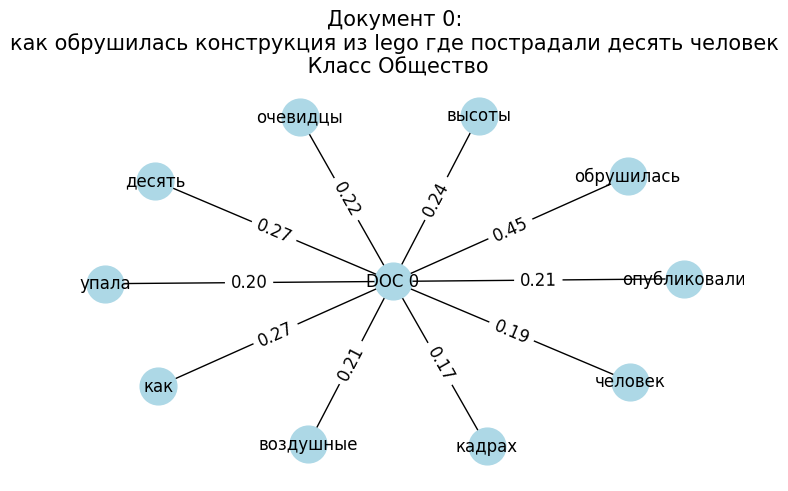

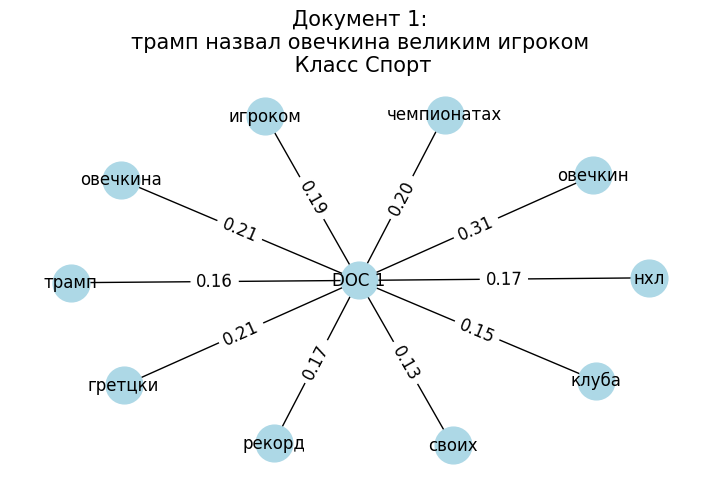

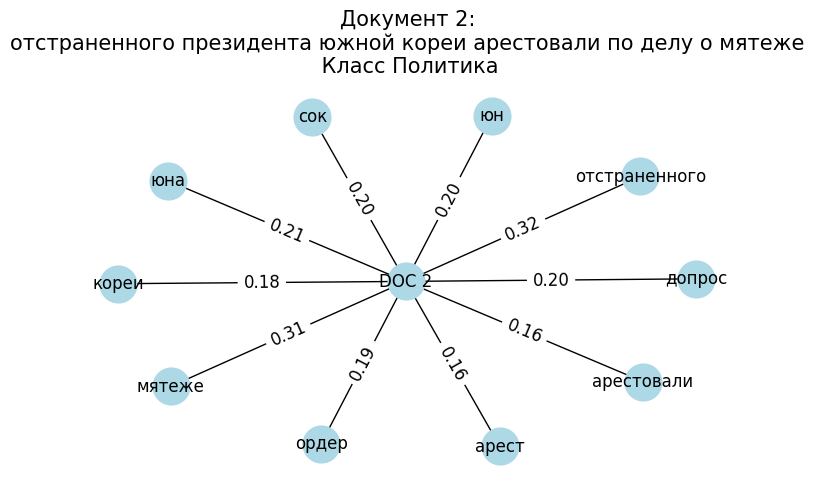

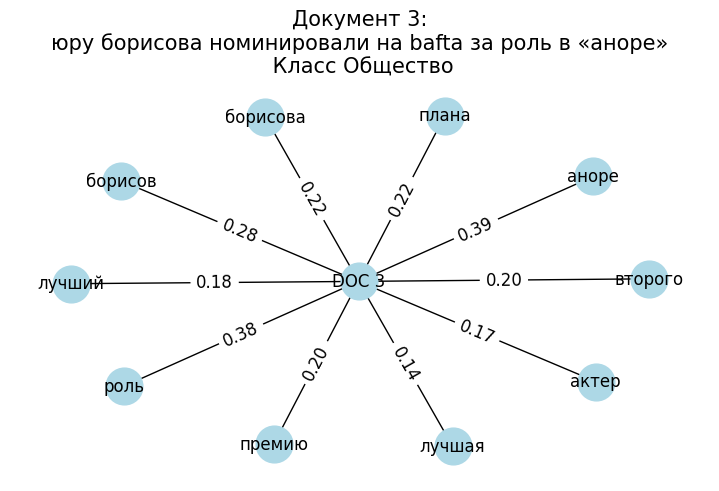

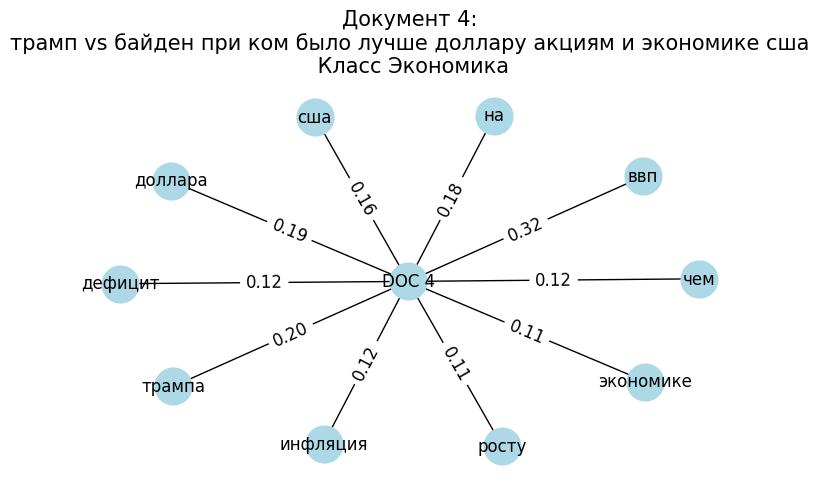

In [ ]:
# Для первых 5 статей
for i in range(5):
    visualize_doc_subgraph(i, data_train, vectorizer=vectorizer, top_k=10)

In [ ]:
def compute_centrality_for_doc(data, vectorizer, doc_id=0, top_k=10):
    word_offset = data.y.shape[0]
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

    G = nx.Graph()
    edge_index = data.edge_index.cpu().numpy()

    for src, dst in edge_index.T:
        G.add_edge(src, dst)

    neighbors = list(G.neighbors(doc_id))
    subgraph_nodes = [doc_id] + neighbors
    subgraph = G.subgraph(subgraph_nodes)

    centrality = nx.degree_centrality(subgraph)
    word_nodes = [n for n in subgraph if n >= word_offset]
    ranked_words = sorted(word_nodes, key=lambda n: centrality.get(n, 0), reverse=True)[:top_k]
    word_centrality = [(index_to_word[n - word_offset], centrality[n]) for n in ranked_words if n - word_offset in index_to_word]

    return word_centrality

In [ ]:
compute_centrality_for_doc(data_train, vectorizer)

[('которые', 0.009900990099009901),
 ('2024', 0.009900990099009901),
 ('2025', 0.009900990099009901),
 ('вызовами', 0.009900990099009901),
 ('опубликовали', 0.009900990099009901),
 ('инфраструктуру', 0.009900990099009901),
 ('технология', 0.009900990099009901),
 ('товары', 0.009900990099009901),
 ('десять', 0.009900990099009901),
 ('электроника', 0.009900990099009901)]

# Построение и обучение моделей

In [ ]:
def train(model, optimizer, loss_fn, num_epochs, print_every, model_name):
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for epoch in range(1, num_epochs + 1):
      model.train()
      optimizer.zero_grad()
      out = model(data_train)
      loss = loss_fn(out[:len(X_train)][data_train.train_mask], data_train.y)
      loss.backward()
      optimizer.step()

      with torch.no_grad():
          pred_train = out[:len(X_train)].max(dim=1)[1]
          train_acc = accuracy_score(data_train.y.cpu().numpy(), pred_train.cpu().numpy())

      model.eval()
      with torch.no_grad():
          out = model(data_test)
          val_loss = loss_fn(out[:len(X_test)], data_test.y)
          pred_test = out[:len(X_test)].max(dim=1)[1]
          val_acc = accuracy_score(data_test.y.cpu().numpy(), pred_test.cpu().numpy())

      train_losses.append(loss.item())
      train_accs.append(train_acc)
      val_losses.append(val_loss.item())
      val_accs.append(val_acc)

      if epoch % print_every == 0:
          print(f'Epoch {epoch}/{num_epochs}')
          print(f'Train - Loss: {loss.item():.4f}, Accuracy: {train_acc:.4f}, Val - Loss: {val_loss.item():.4f}, Accuracy: {val_acc:.4f}')
    plt.title(f'Accuracy (train - red) on {model_name}')
    plt.plot(train_accs, color='r')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy score')
    plt.plot(val_accs)
    plt.show()
    return {'train_losses': train_losses, 'train_accs': train_accs, 'val_losses': val_losses, 'val_accs' :val_accs}

In [ ]:
def test(model):
    model.eval()
    with torch.no_grad():
        out = model(data_test)
        _, pred = out[:len(X_test)].max(dim=1)
        true = data_test.y.cpu().numpy()
        pred = pred.cpu().numpy()
        acc = accuracy_score(true, pred)
        f1 = f1_score(true, pred, average='weighted')

    return acc, f1

## GCN (с настройкой параметров)

In [ ]:
class GCNvar(nn.Module):
    def __init__(self, in_channels, num_layers, num_classes, max_hidden, add_dropout=False, add_bn=False):
        super(GCNvar, self).__init__()
        outs = [in_channels] + [max_hidden//2**i for i in range(num_layers - 1)]
        self.add_dropout = add_dropout
        self.add_bn = add_bn
        self.num_layers = num_layers
        self.layers = []
        self.bns=[]
        for i in range(len(outs) - 1):
            self.layers.append(GCNConv(outs[i], outs[i + 1]))
            if add_bn:
              self.bns.append(torch.nn.BatchNorm1d(outs[i + 1]))
        self.layers.append(GCNConv(outs[-1], num_classes))
        self.model = nn.Sequential(*self.layers)
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        for i in range(self.num_layers-1):
            x = self.layers[i](x, edge_index)
            if self.add_bn:
                x = self.bns[i](x).relu()
            else:
                x = F.relu(x)
            if self.add_dropout:
                x = F.dropout(x, training=self.training)
        x = self.layers[-1](x, edge_index)
        return F.log_softmax(x, dim=1)

Epoch 10/30
Train - Loss: 1.0872, Accuracy: 0.8061, Val - Loss: 1.1027, Accuracy: 0.7464
Epoch 20/30
Train - Loss: 0.6902, Accuracy: 0.8529, Val - Loss: 0.8100, Accuracy: 0.7948
Epoch 30/30
Train - Loss: 0.4865, Accuracy: 0.8844, Val - Loss: 0.6699, Accuracy: 0.8304


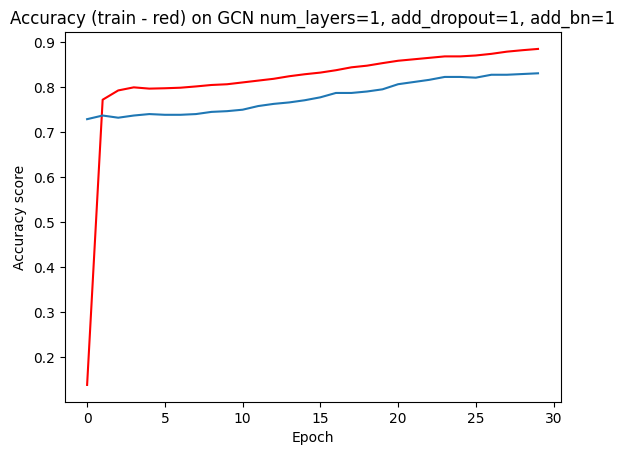

Epoch 10/30
Train - Loss: 1.0867, Accuracy: 0.8077, Val - Loss: 1.1017, Accuracy: 0.7399
Epoch 20/30
Train - Loss: 0.6899, Accuracy: 0.8517, Val - Loss: 0.8092, Accuracy: 0.7948
Epoch 30/30
Train - Loss: 0.4863, Accuracy: 0.8840, Val - Loss: 0.6691, Accuracy: 0.8320


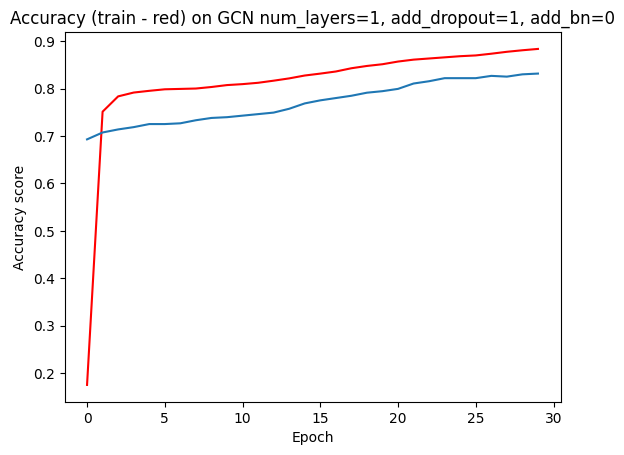

Epoch 10/30
Train - Loss: 1.0867, Accuracy: 0.8065, Val - Loss: 1.1019, Accuracy: 0.7399
Epoch 20/30
Train - Loss: 0.6899, Accuracy: 0.8521, Val - Loss: 0.8095, Accuracy: 0.7932
Epoch 30/30
Train - Loss: 0.4862, Accuracy: 0.8828, Val - Loss: 0.6693, Accuracy: 0.8352


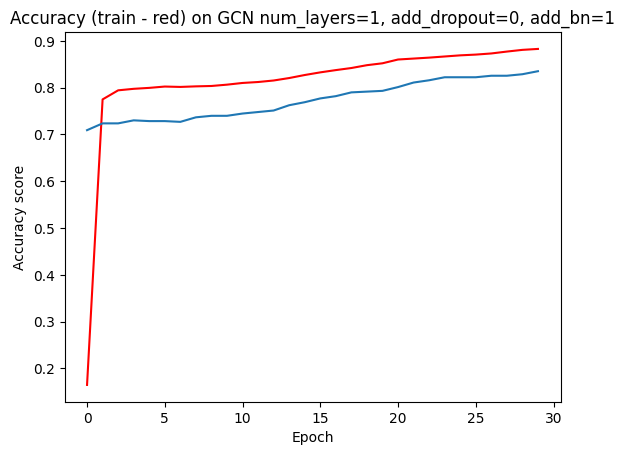

Epoch 10/30
Train - Loss: 1.0887, Accuracy: 0.8081, Val - Loss: 1.1031, Accuracy: 0.7480
Epoch 20/30
Train - Loss: 0.6909, Accuracy: 0.8533, Val - Loss: 0.8099, Accuracy: 0.7981
Epoch 30/30
Train - Loss: 0.4869, Accuracy: 0.8832, Val - Loss: 0.6696, Accuracy: 0.8304


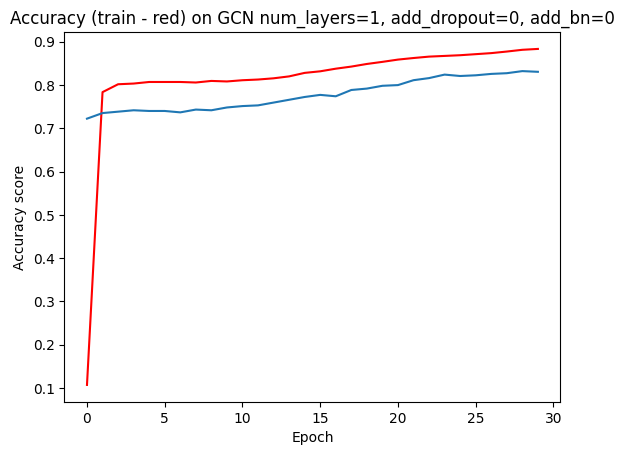

Epoch 10/30
Train - Loss: 0.9382, Accuracy: 0.7248, Val - Loss: 0.7831, Accuracy: 0.8239
Epoch 20/30
Train - Loss: 0.6858, Accuracy: 0.8230, Val - Loss: 0.6396, Accuracy: 0.8158
Epoch 30/30
Train - Loss: 0.5013, Accuracy: 0.8731, Val - Loss: 0.5701, Accuracy: 0.8223


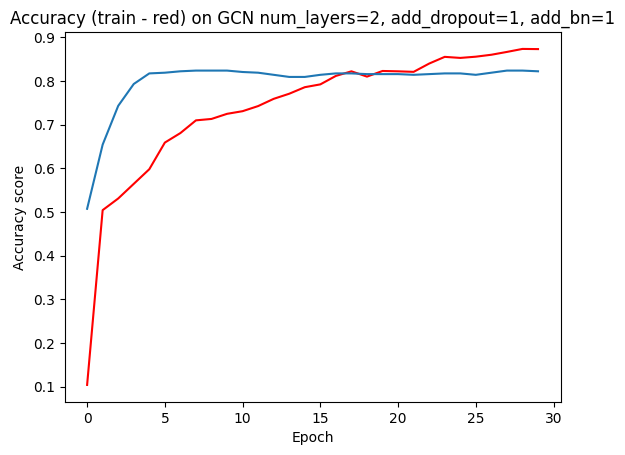

Epoch 10/30
Train - Loss: 0.4104, Accuracy: 0.8731, Val - Loss: 0.5791, Accuracy: 0.8271
Epoch 20/30
Train - Loss: 0.0998, Accuracy: 0.9875, Val - Loss: 0.4494, Accuracy: 0.8756
Epoch 30/30
Train - Loss: 0.0235, Accuracy: 0.9968, Val - Loss: 0.5601, Accuracy: 0.8708


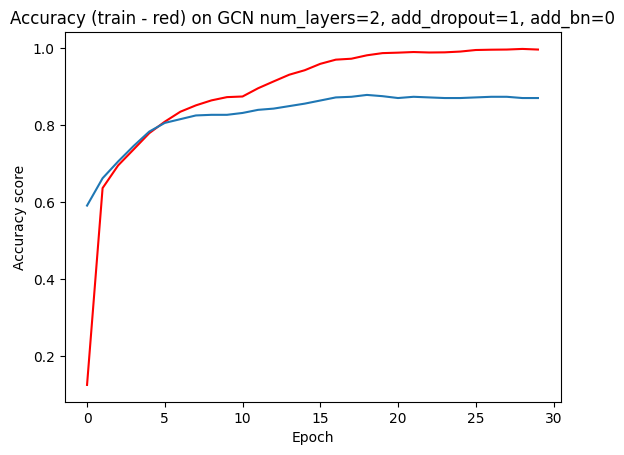

Epoch 10/30
Train - Loss: 0.8969, Accuracy: 0.8723, Val - Loss: 0.8372, Accuracy: 0.8094
Epoch 20/30
Train - Loss: 0.5924, Accuracy: 0.8780, Val - Loss: 0.6522, Accuracy: 0.8207
Epoch 30/30
Train - Loss: 0.3949, Accuracy: 0.8974, Val - Loss: 0.5681, Accuracy: 0.8239


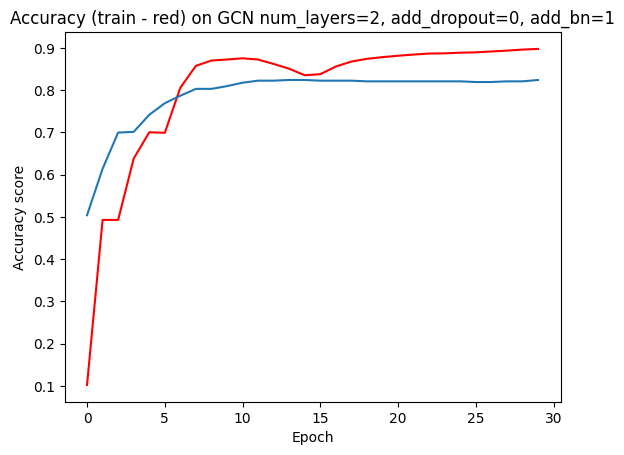

Epoch 10/30
Train - Loss: 0.3430, Accuracy: 0.8877, Val - Loss: 0.5574, Accuracy: 0.8320
Epoch 20/30
Train - Loss: 0.0616, Accuracy: 0.9972, Val - Loss: 0.4509, Accuracy: 0.8756
Epoch 30/30
Train - Loss: 0.0078, Accuracy: 1.0000, Val - Loss: 0.5593, Accuracy: 0.8675


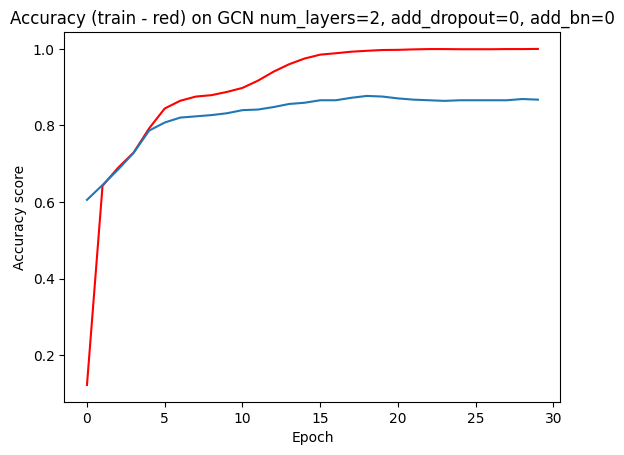

Epoch 10/30
Train - Loss: 1.2342, Accuracy: 0.5366, Val - Loss: 0.9467, Accuracy: 0.7964
Epoch 20/30
Train - Loss: 0.9678, Accuracy: 0.7018, Val - Loss: 0.7302, Accuracy: 0.8191
Epoch 30/30
Train - Loss: 0.7305, Accuracy: 0.7822, Val - Loss: 0.5973, Accuracy: 0.8271


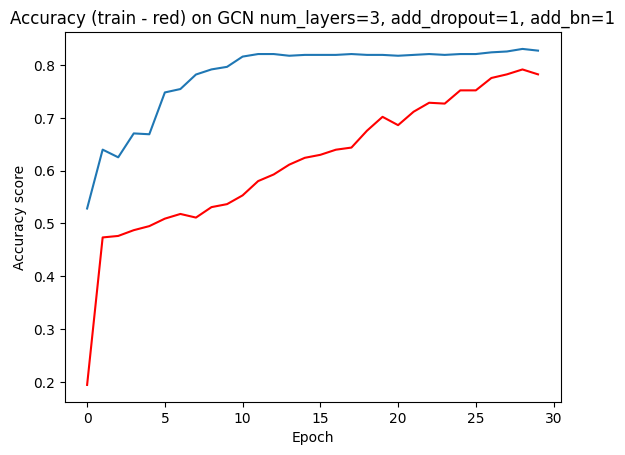

Epoch 10/30
Train - Loss: 0.4576, Accuracy: 0.8618, Val - Loss: 0.5415, Accuracy: 0.8336
Epoch 20/30
Train - Loss: 0.1800, Accuracy: 0.9224, Val - Loss: 0.6439, Accuracy: 0.8481
Epoch 30/30
Train - Loss: 0.0849, Accuracy: 0.9758, Val - Loss: 0.8558, Accuracy: 0.8627


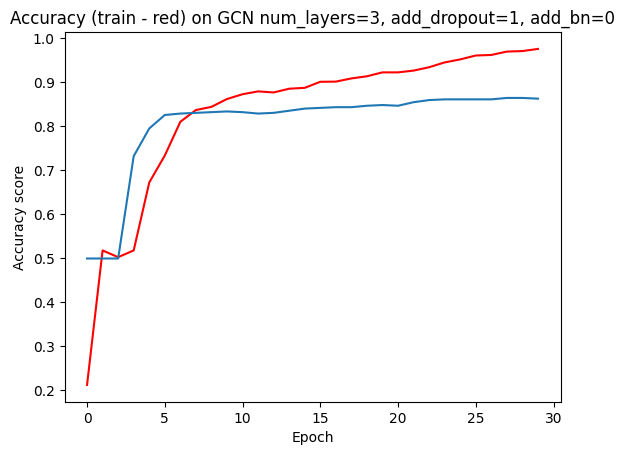

Epoch 10/30
Train - Loss: 1.1507, Accuracy: 0.5887, Val - Loss: 0.9680, Accuracy: 0.8078
Epoch 20/30
Train - Loss: 0.9474, Accuracy: 0.7527, Val - Loss: 0.8070, Accuracy: 0.8271
Epoch 30/30
Train - Loss: 0.6634, Accuracy: 0.8937, Val - Loss: 0.6306, Accuracy: 0.8368


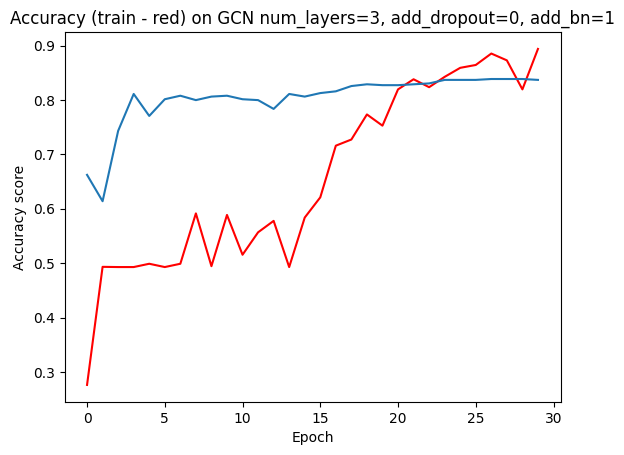

Epoch 10/30
Train - Loss: 0.3420, Accuracy: 0.8800, Val - Loss: 0.5273, Accuracy: 0.8352
Epoch 20/30
Train - Loss: 0.0382, Accuracy: 0.9988, Val - Loss: 0.5919, Accuracy: 0.8595
Epoch 30/30
Train - Loss: 0.0011, Accuracy: 1.0000, Val - Loss: 0.8807, Accuracy: 0.8546


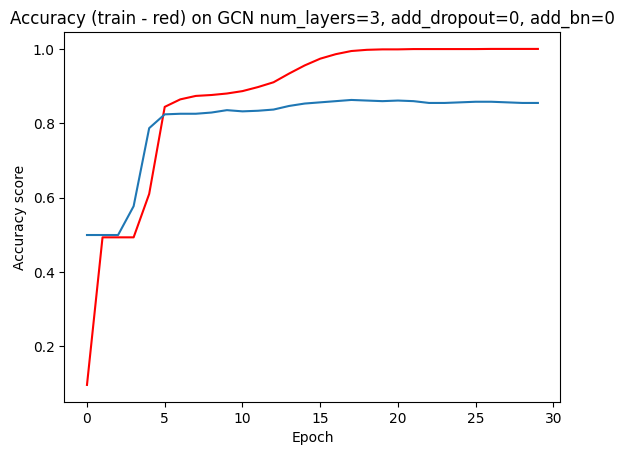

Epoch 10/30
Train - Loss: 1.4437, Accuracy: 0.4416, Val - Loss: 1.3248, Accuracy: 0.4992
Epoch 20/30
Train - Loss: 1.4109, Accuracy: 0.4606, Val - Loss: 1.3022, Accuracy: 0.4992
Epoch 30/30
Train - Loss: 1.3707, Accuracy: 0.4824, Val - Loss: 1.2872, Accuracy: 0.4992


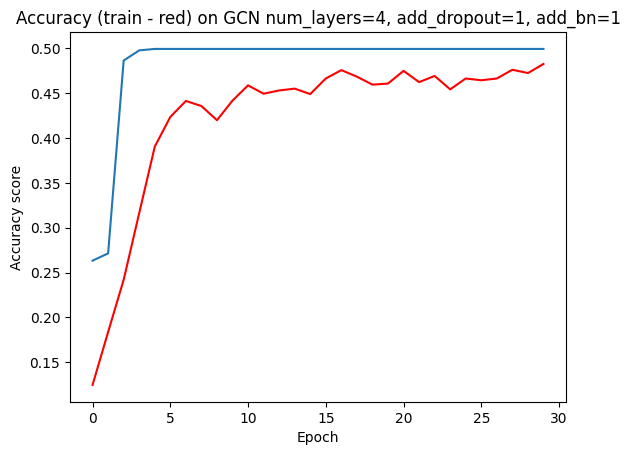

Epoch 10/30
Train - Loss: 0.6101, Accuracy: 0.8000, Val - Loss: 0.5890, Accuracy: 0.8255
Epoch 20/30
Train - Loss: 0.2321, Accuracy: 0.9014, Val - Loss: 0.7631, Accuracy: 0.8368
Epoch 30/30
Train - Loss: 0.1854, Accuracy: 0.9091, Val - Loss: 1.2062, Accuracy: 0.8417


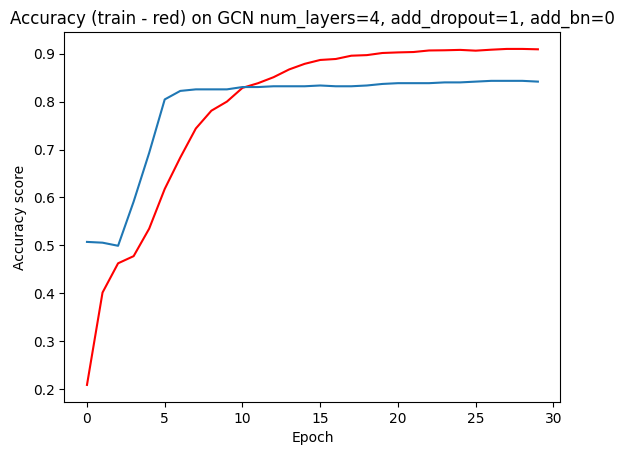

Epoch 10/30
Train - Loss: 1.3881, Accuracy: 0.4929, Val - Loss: 1.4065, Accuracy: 0.6123
Epoch 20/30
Train - Loss: 1.2938, Accuracy: 0.4929, Val - Loss: 1.2000, Accuracy: 0.5267
Epoch 30/30
Train - Loss: 1.3276, Accuracy: 0.4929, Val - Loss: 1.2331, Accuracy: 0.4992


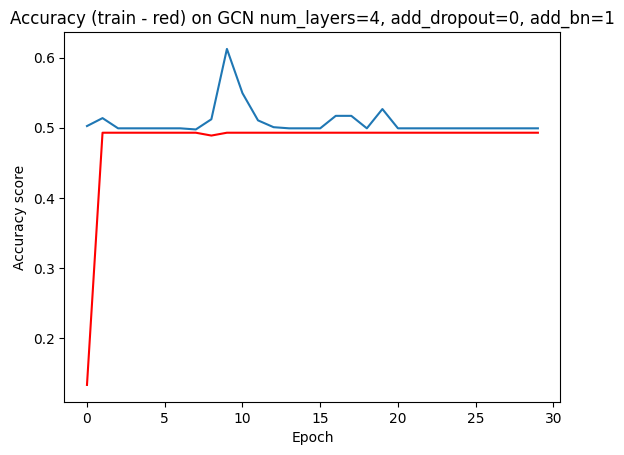

Epoch 10/30
Train - Loss: 0.4609, Accuracy: 0.8760, Val - Loss: 0.6717, Accuracy: 0.8352
Epoch 20/30
Train - Loss: 0.1431, Accuracy: 0.9370, Val - Loss: 0.6388, Accuracy: 0.8449
Epoch 30/30
Train - Loss: 0.0399, Accuracy: 0.9988, Val - Loss: 0.9561, Accuracy: 0.8659


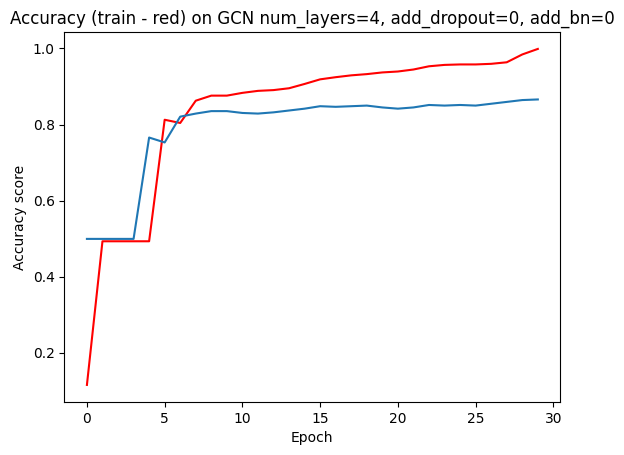

Epoch 10/30
Train - Loss: 1.6430, Accuracy: 0.3669, Val - Loss: 1.4738, Accuracy: 0.4992
Epoch 20/30
Train - Loss: 1.4740, Accuracy: 0.4356, Val - Loss: 1.3499, Accuracy: 0.4992
Epoch 30/30
Train - Loss: 1.4276, Accuracy: 0.4343, Val - Loss: 1.3151, Accuracy: 0.4992


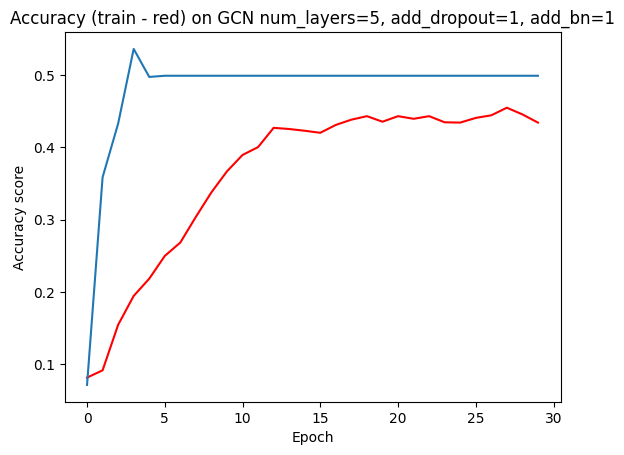

Epoch 10/30
Train - Loss: 1.0350, Accuracy: 0.5814, Val - Loss: 1.0004, Accuracy: 0.7415
Epoch 20/30
Train - Loss: 0.5551, Accuracy: 0.8198, Val - Loss: 1.1126, Accuracy: 0.8368
Epoch 30/30
Train - Loss: 0.3139, Accuracy: 0.8756, Val - Loss: 1.3418, Accuracy: 0.8320


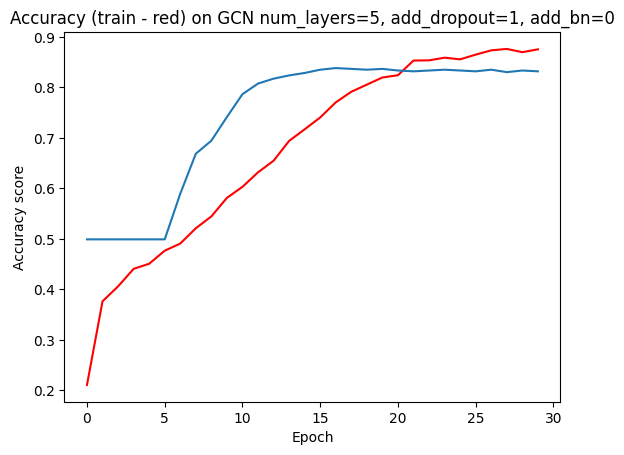

Epoch 10/30
Train - Loss: 1.4227, Accuracy: 0.4929, Val - Loss: 1.3918, Accuracy: 0.4992
Epoch 20/30
Train - Loss: 1.3642, Accuracy: 0.4929, Val - Loss: 1.2846, Accuracy: 0.4992
Epoch 30/30
Train - Loss: 1.3663, Accuracy: 0.4929, Val - Loss: 1.3142, Accuracy: 0.5008


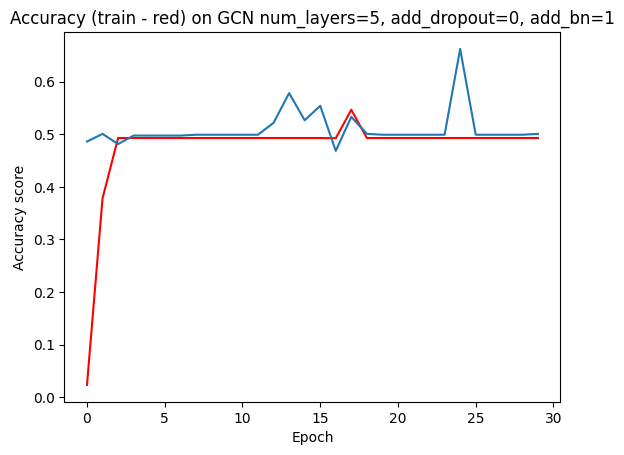

Epoch 10/30
Train - Loss: 0.4279, Accuracy: 0.8780, Val - Loss: 0.6409, Accuracy: 0.8271
Epoch 20/30
Train - Loss: 0.1088, Accuracy: 0.9580, Val - Loss: 0.7392, Accuracy: 0.8433
Epoch 30/30
Train - Loss: 0.0128, Accuracy: 1.0000, Val - Loss: 1.3575, Accuracy: 0.8320


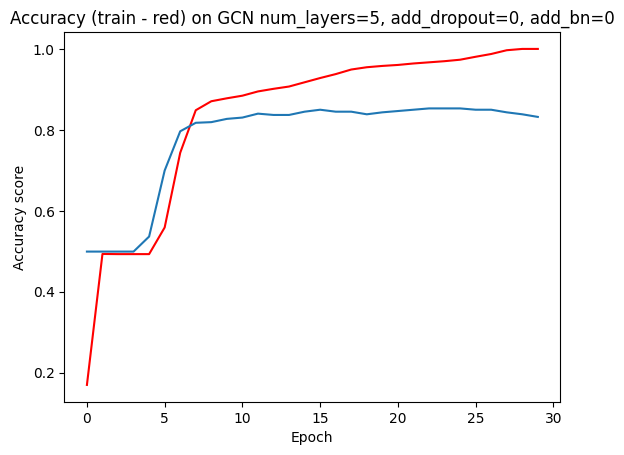

In [ ]:
results = {}
for n_layers in range(1, 6):
    for add_dropout, add_bn in list(product([1, 0], repeat=2)):
            model = GCNvar(in_channels=data_train.x.shape[1], num_layers=n_layers, num_classes=len(label_encoder.classes_), max_hidden=128, add_dropout=add_dropout, add_bn=add_bn)
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
            loss_fn = torch.nn.CrossEntropyLoss()
            num_epochs = 30
            reses = train(model, optimizer, loss_fn, num_epochs, 10, f"GCN num_layers={n_layers}, add_dropout={add_dropout}, add_bn={add_bn}")
            results[f'num_layers={n_layers}, add_dropout={add_dropout}, add_bn={add_bn}'] = test(model)

In [ ]:
best_params = list(results.keys())[np.argmax([np.mean(i) for i in results.values()])]
best_metrics = list(results.values())[np.argmax([np.mean(i) for i in results.values()])]

In [ ]:
def test(model):
    model.eval()
    with torch.no_grad():
        out = model(data_test)
        # Use only the document nodes for testing
        _, pred = out[:len(X_test)].max(dim=1)
        true = data_test.y.cpu().numpy()
        pred = pred.cpu().numpy()

        acc = accuracy_score(true, pred)
        f1 = f1_score(true, pred, average='weighted')
        cm = confusion_matrix(true, pred)
        cr = classification_report(true, pred, target_names=label_encoder.classes_, zero_division=0)

    return acc, f1, cm, cr

In [ ]:
best_params, best_metrics

('num_layers=2, add_dropout=1, add_bn=0',
 (0.8707592891760905, 0.8627345365229151))

Epoch 10/30
Train - Loss: 0.4128, Accuracy: 0.8663, Val - Loss: 0.5688, Accuracy: 0.8239
Epoch 20/30
Train - Loss: 0.1077, Accuracy: 0.9814, Val - Loss: 0.4474, Accuracy: 0.8675
Epoch 30/30
Train - Loss: 0.0251, Accuracy: 0.9980, Val - Loss: 0.5515, Accuracy: 0.8691


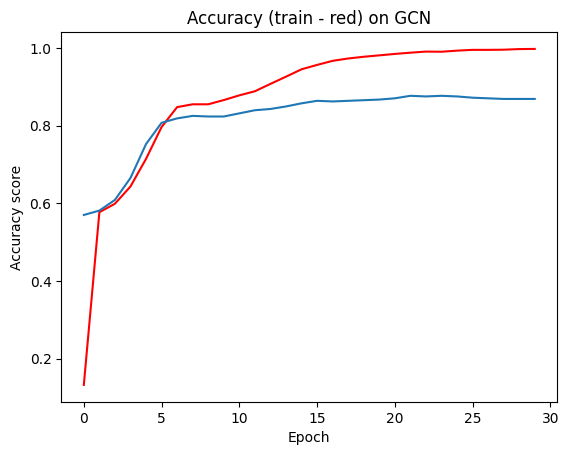

In [ ]:
modelgcn = GCNvar(in_channels=data_train.x.shape[1], num_classes=len(label_encoder.classes_), max_hidden=128, num_layers=2, add_dropout=1, add_bn=0)
optimizer = torch.optim.Adam(modelgcn.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
res_gcn = train(modelgcn, optimizer, loss_fn, num_epochs, 10, f"GCN")
test_gcn = test(modelgcn)

## GAT

In [ ]:
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, add_bn=False, add_dropout=False):
        super().__init__()
        self.add_bn = add_bn
        self.add_dropout = add_dropout
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        if self.add_bn == True:
            self.bn1 = torch.nn.BatchNorm1d(hidden_channels * 4)
        self.gat2 = GATConv(hidden_channels * 4, out_channels, heads=1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        if self.add_bn == True:
            x = self.gat1(x, edge_index)
            x = self.bn1(x).relu()
        else:
            x = self.gat1(x, edge_index).relu()
        if self.add_dropout:
            x = F.dropout(x, training=self.training)
        x = self.gat2(x, edge_index)
        return x

Epoch 10/30
Train - Loss: 0.3143, Accuracy: 0.8865, Val - Loss: 0.5587, Accuracy: 0.8352
Epoch 20/30
Train - Loss: 0.0433, Accuracy: 0.9972, Val - Loss: 0.4637, Accuracy: 0.8756
Epoch 30/30
Train - Loss: 0.0062, Accuracy: 1.0000, Val - Loss: 0.5979, Accuracy: 0.8627


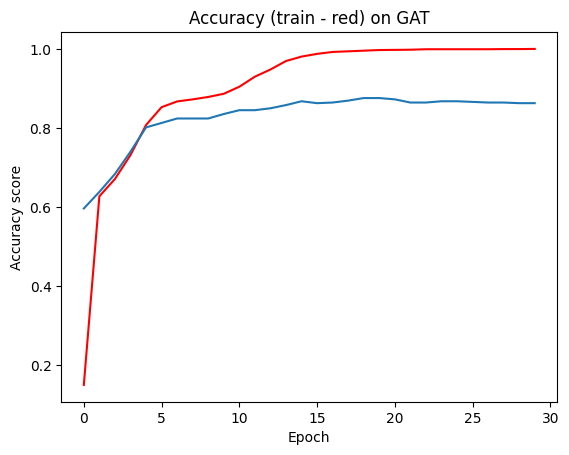

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
modelgat = GAT(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32)
optimizer = torch.optim.Adam(modelgat.parameters(), lr=0.01)
res_gat = train(modelgat, optimizer, loss_fn, num_epochs, 10, 'GAT')
test_gat = test(modelgat)

Epoch 10/30
Train - Loss: 0.0520, Accuracy: 0.9915, Val - Loss: 0.8007, Accuracy: 0.8045
Epoch 20/30
Train - Loss: 0.0192, Accuracy: 0.9996, Val - Loss: 0.5088, Accuracy: 0.8611
Epoch 30/30
Train - Loss: 0.0086, Accuracy: 1.0000, Val - Loss: 0.4620, Accuracy: 0.8611


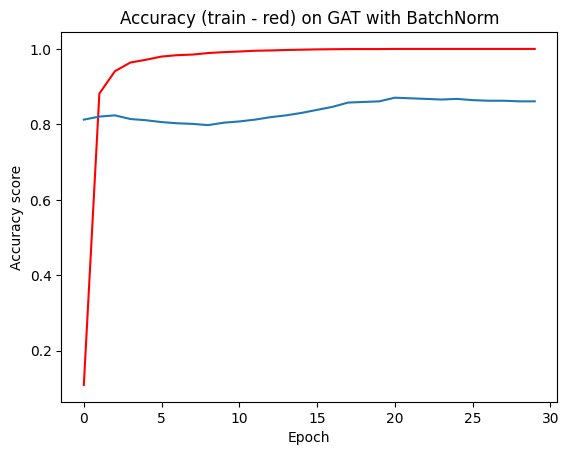

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
modelgatbn = GAT(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32, add_bn=True)
optimizer = torch.optim.Adam(modelgatbn.parameters(), lr=0.01)
res_gatbn = train(modelgatbn, optimizer, loss_fn, num_epochs, 10, 'GAT with BatchNorm')
test_gatbn = test(modelgatbn)

Epoch 10/30
Train - Loss: 0.0920, Accuracy: 0.9721, Val - Loss: 0.8556, Accuracy: 0.8223
Epoch 20/30
Train - Loss: 0.0434, Accuracy: 0.9935, Val - Loss: 0.5318, Accuracy: 0.8724
Epoch 30/30
Train - Loss: 0.0204, Accuracy: 0.9988, Val - Loss: 0.4559, Accuracy: 0.8691


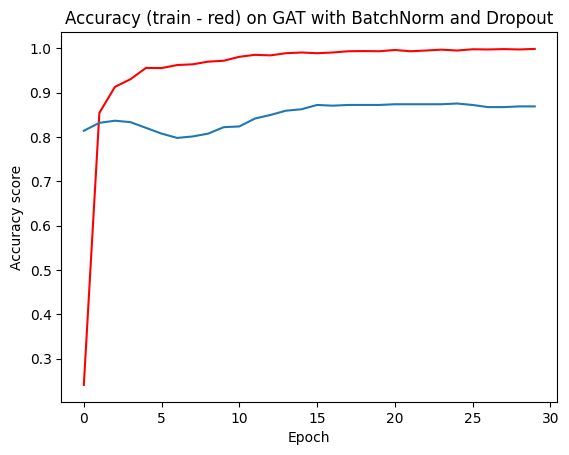

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
modelgatbndo = GAT(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32, add_bn=True, add_dropout=True)
optimizer = torch.optim.Adam(modelgatbndo.parameters(), lr=0.01)
res_gatbndo = train(modelgatbndo, optimizer, loss_fn, num_epochs, 10, 'GAT with BatchNorm and Dropout')
test_gatbndo = test(modelgatbndo)

## GATv2

In [ ]:
class GATv2Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super().__init__()
        self.gat1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.gat2 = GATv2Conv(hidden_channels * heads, out_channels, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.gat1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.gat2(x, edge_index)
        return x

Epoch 10/30
Train - Loss: 0.3719, Accuracy: 0.8836, Val - Loss: 0.5386, Accuracy: 0.8368
Epoch 20/30
Train - Loss: 0.1068, Accuracy: 0.9818, Val - Loss: 0.4487, Accuracy: 0.8740
Epoch 30/30
Train - Loss: 0.0242, Accuracy: 0.9968, Val - Loss: 0.5490, Accuracy: 0.8659


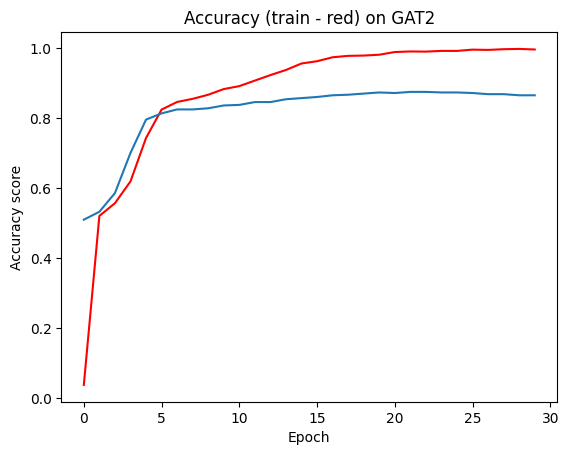

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
modelgat2 = GATv2Net(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32)
optimizer = torch.optim.Adam(modelgat2.parameters(), lr=0.01)
res_gat2 = train(modelgat2, optimizer, loss_fn, num_epochs, 10, 'GAT2')
test_gat2 = test(modelgat2)

## ResidualGAT

In [ ]:
class ResidualGAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super().__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * 4, hidden_channels, heads=1)
        self.res = torch.nn.Linear(in_channels, hidden_channels)
        self.out = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        res = self.res(x)
        x = F.elu(self.gat1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = F.elu(self.gat2(x, edge_index) + res)
        return self.out(x)

Epoch 10/30
Train - Loss: 0.3034, Accuracy: 0.8913, Val - Loss: 0.5663, Accuracy: 0.8384
Epoch 20/30
Train - Loss: 0.0374, Accuracy: 0.9960, Val - Loss: 0.6417, Accuracy: 0.8724
Epoch 30/30
Train - Loss: 0.0040, Accuracy: 1.0000, Val - Loss: 0.9029, Accuracy: 0.8691


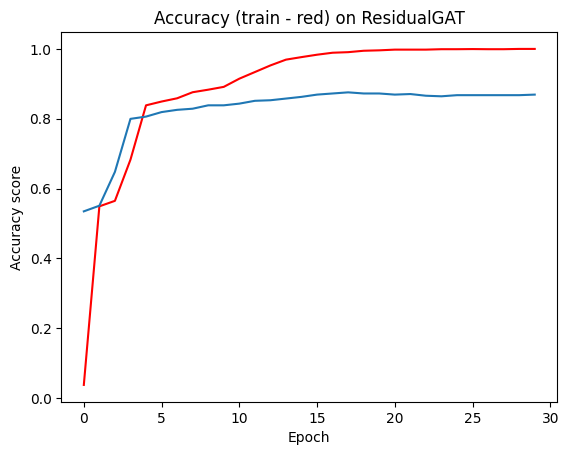

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
resgat = ResidualGAT(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32)
optimizer = torch.optim.Adam(resgat.parameters(), lr=0.01)
res_resgat = train(resgat, optimizer, loss_fn, num_epochs, 10, 'ResidualGAT')
test_resgat = test(resgat)

## SuperGATNet

In [ ]:
class SuperGATNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.gat1 = SuperGATConv(in_channels, hidden_channels)
        self.gat2 = SuperGATConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.gat2(x, edge_index)
        return x

Epoch 10/30
Train - Loss: 0.5875, Accuracy: 0.8469, Val - Loss: 0.6580, Accuracy: 0.8239
Epoch 20/30
Train - Loss: 0.2391, Accuracy: 0.9386, Val - Loss: 0.4587, Accuracy: 0.8481
Epoch 30/30
Train - Loss: 0.1042, Accuracy: 0.9859, Val - Loss: 0.4362, Accuracy: 0.8643


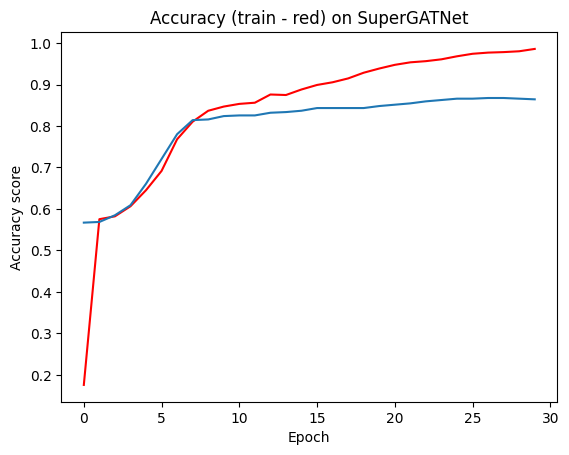

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
supergat = SuperGATNet(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32)
optimizer = torch.optim.Adam(supergat.parameters(), lr=0.01)
res_supergat = train(supergat, optimizer, loss_fn, num_epochs, 10, 'SuperGATNet')
test_supergat = test(supergat)

## JKNet

In [48]:
class JKNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList([
            GCNConv(in_channels, hidden_channels),
            GCNConv(hidden_channels, hidden_channels),
            GCNConv(hidden_channels, hidden_channels)
        ])
        self.jump = JumpingKnowledge(mode='cat')
        self.fc = torch.nn.Linear(hidden_channels * 3, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        xs = []
        for conv in self.convs:
            x = F.elu(conv(x, edge_index))
            xs.append(x)
        x = self.jump(xs)
        return self.fc(x)

Epoch 10/30
Train - Loss: 0.4647, Accuracy: 0.8723, Val - Loss: 0.5705, Accuracy: 0.8271
Epoch 20/30
Train - Loss: 0.0839, Accuracy: 0.9911, Val - Loss: 0.5945, Accuracy: 0.8578
Epoch 30/30
Train - Loss: 0.0083, Accuracy: 1.0000, Val - Loss: 0.8462, Accuracy: 0.8546


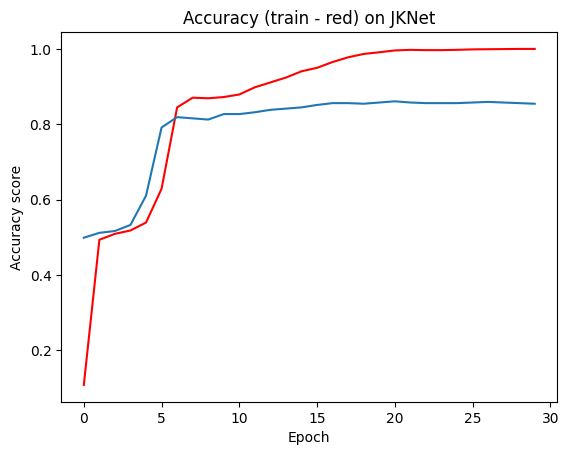

In [49]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
modeljk = JKNet(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32)
optimizer = torch.optim.Adam(modeljk.parameters(), lr=0.01)
res_jk = train(modeljk, optimizer, loss_fn, num_epochs, 10, 'JKNet')
test_jk = test(modeljk)

## APPNPNet

In [50]:
class APPNPNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, K=10, alpha=0.1):
        super().__init__()
        self.lin1 = torch.nn.Linear(in_channels, hidden_channels)
        self.lin2 = torch.nn.Linear(hidden_channels, out_channels)
        self.prop = APPNP(K=K, alpha=alpha)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        x = self.prop(x, edge_index)
        return x

Epoch 10/30
Train - Loss: 0.8801, Accuracy: 0.7491, Val - Loss: 0.9297, Accuracy: 0.7092
Epoch 20/30
Train - Loss: 0.3730, Accuracy: 0.8820, Val - Loss: 0.5592, Accuracy: 0.8304
Epoch 30/30
Train - Loss: 0.1715, Accuracy: 0.9766, Val - Loss: 0.4535, Accuracy: 0.8578


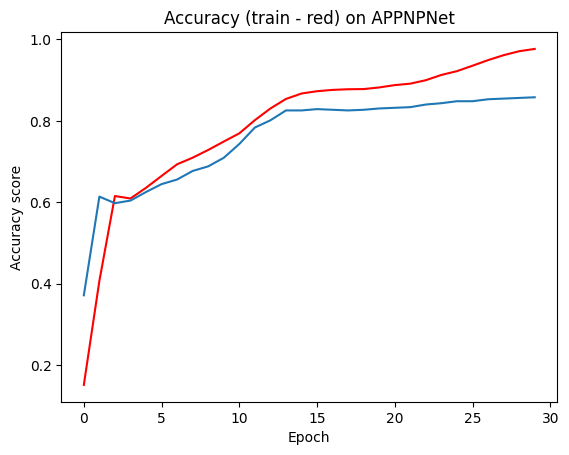

In [51]:
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 30
appnp = APPNPNet(in_channels=data_train.x.shape[1], out_channels=len(label_encoder.classes_), hidden_channels=32)
optimizer = torch.optim.Adam(appnp.parameters(), lr=0.01)
res_appnp = train(appnp, optimizer, loss_fn, num_epochs, 10, 'APPNPNet')
test_appnp = test(appnp)

# Анализ работы моделей

Модели с механизмом внимания

In [52]:
def visualize_attention(model, data, vectorizer, doc_id, model_name, top_k=10):
    model.eval()
    word_offset = data.y.shape[0]
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

    with torch.no_grad():
        x, edge_index = data.x, data.edge_index
        out, (edge_index_attn, attn_weights) = model.gat1(x, edge_index, return_attention_weights=True)

    doc_node = doc_id
    edges = edge_index_attn.t().tolist()

    attn_weights = attn_weights.cpu().numpy()
    if attn_weights.ndim == 2:
        attn_weights = attn_weights.mean(axis=1)

    doc_word_edges = []
    for (src, dst), weight in zip(edges, attn_weights):
        if src == doc_node and dst >= word_offset:
            word_idx = dst - word_offset
            word = index_to_word.get(word_idx)
            if word:
                doc_word_edges.append((word, weight))

    top_edges = sorted(doc_word_edges, key=lambda x: x[1], reverse=True)[:top_k]

    G = nx.Graph()
    doc_node_label = f"Doc {doc_id}"
    G.add_node(doc_node_label, color='red')

    edge_labels = {}
    for word, weight in top_edges:
        G.add_node(word, color='lightblue')
        G.add_edge(doc_node_label, word, weight=weight)
        edge_labels[(doc_node_label, word)] = f"{weight:.3f}"

    pos = nx.spring_layout(G, seed=42)
    edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]

    fig, ax = plt.subplots(figsize=(12, 7))
    edges = nx.draw_networkx_edges(
        G, pos, ax=ax, edge_color=edge_weights, edge_cmap=plt.cm.Blues,
        edge_vmin=min(edge_weights), edge_vmax=max(edge_weights), width=2.5
    )
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_colors, node_size=1800)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax, font_size=9)

    plt.title(f"{model_name}: Top-{top_k} слов по attention для документа {doc_id}\n{df['title'][X_train.index[doc_id]]}\n Класс {df['category'][X_train.index[doc_id]]}")
    plt.axis('off')
    plt.show()


In [53]:
gatmodels = {
    "GAT": modelgatbndo,
    "GATv2": modelgat2,
    "ResidualGAT": resgat
}

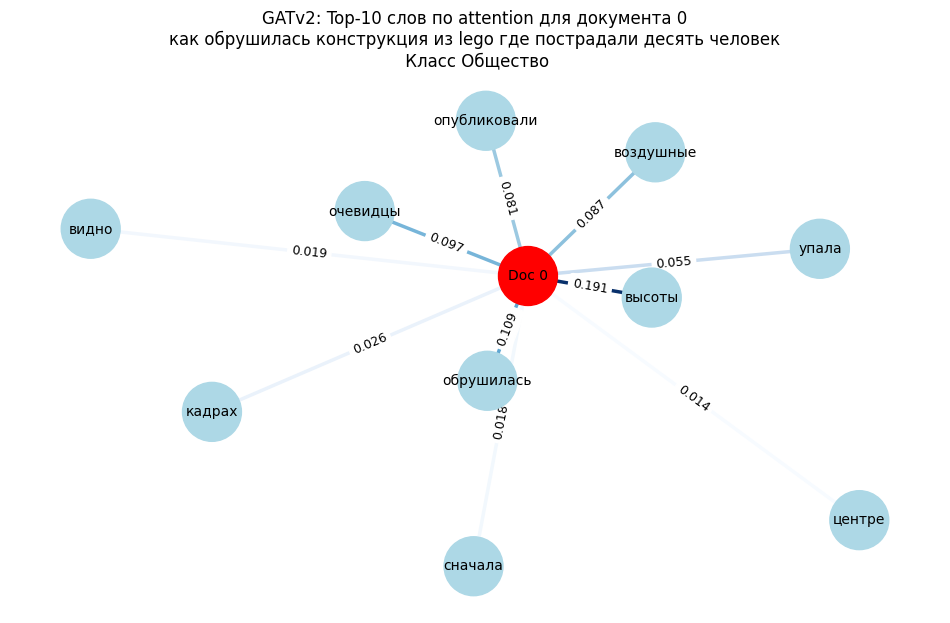

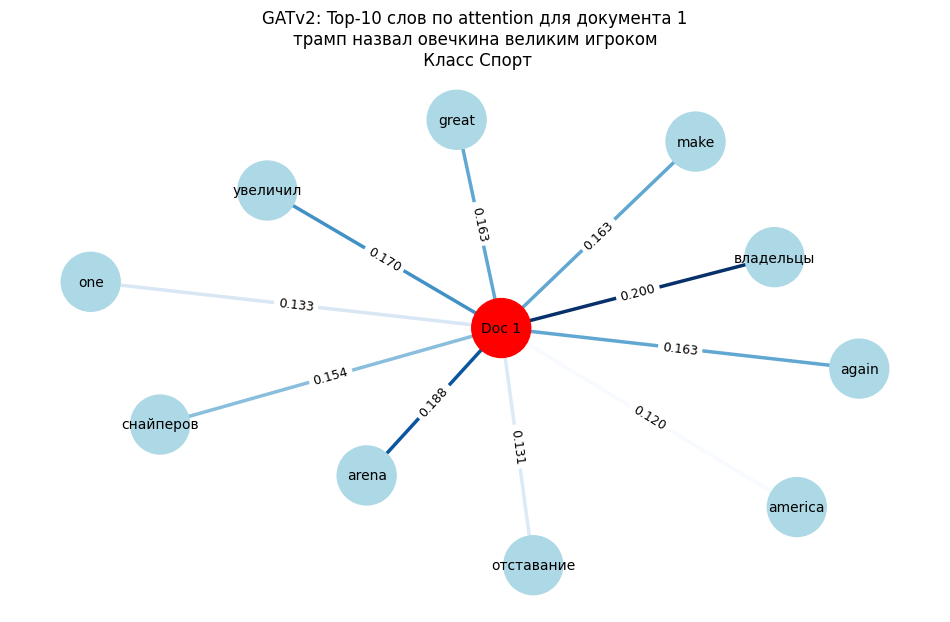

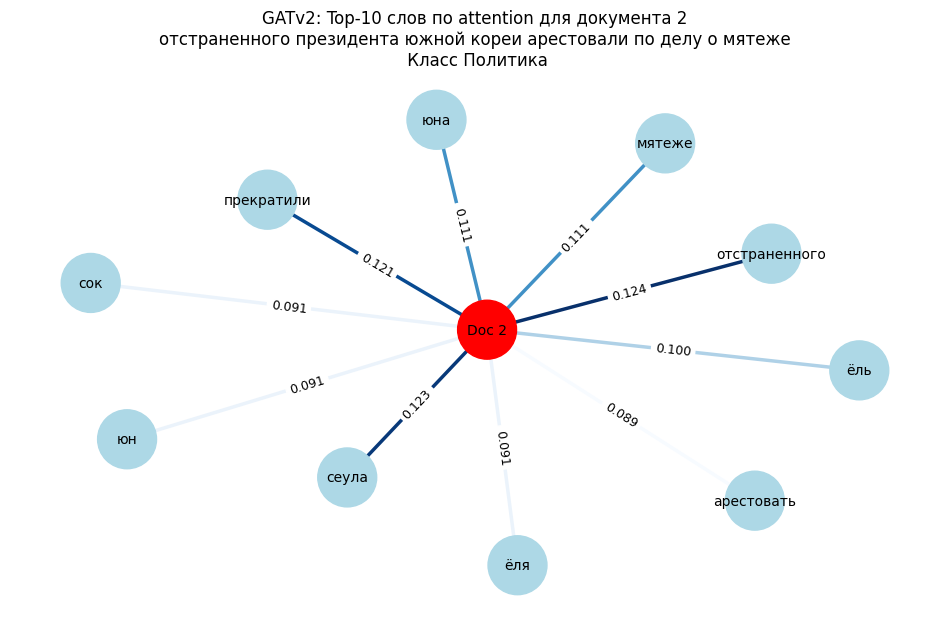

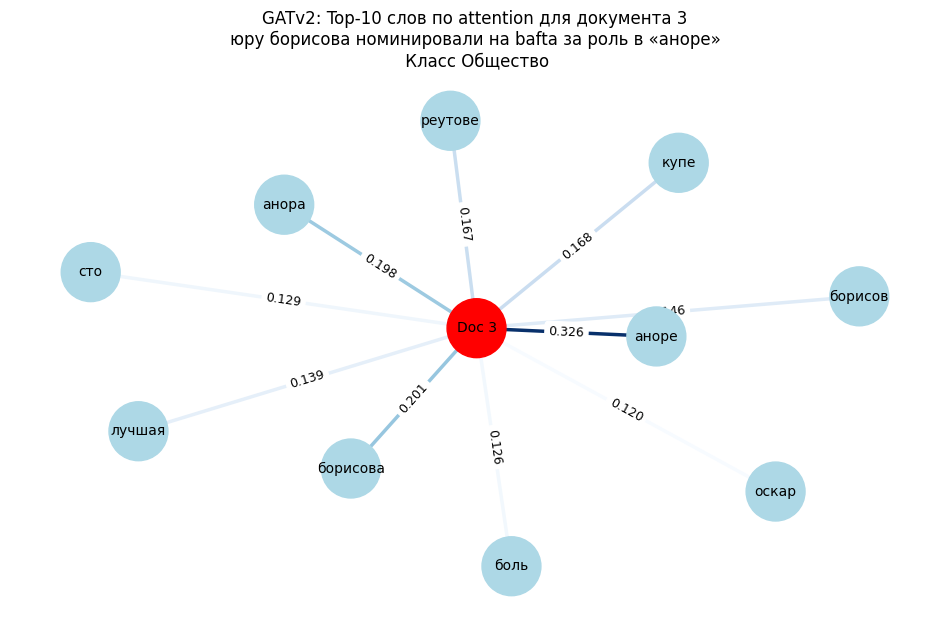

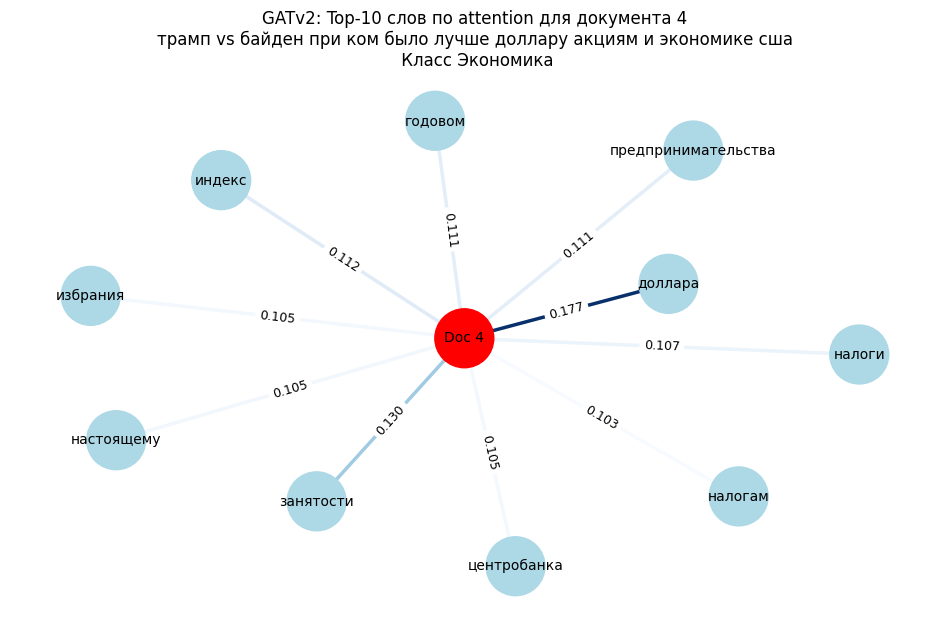

In [54]:
for i in range(5):
    visualize_attention(modelgat2, data_train, vectorizer, i, "GATv2")

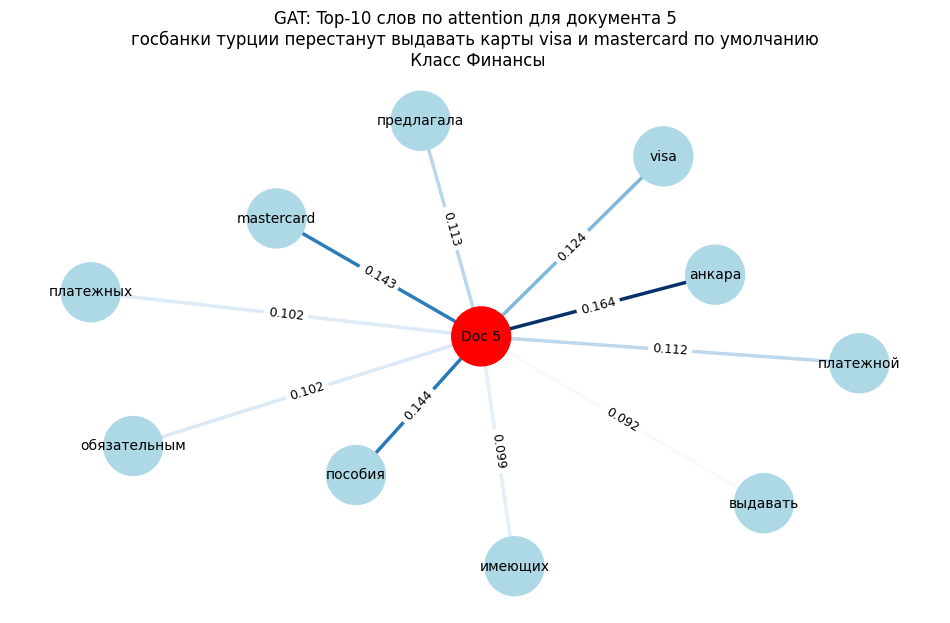

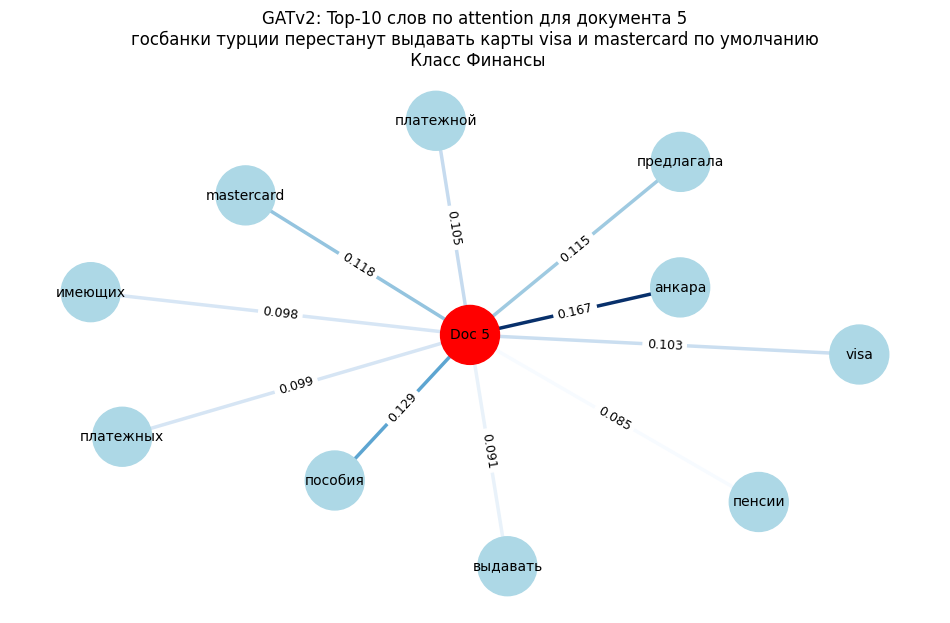

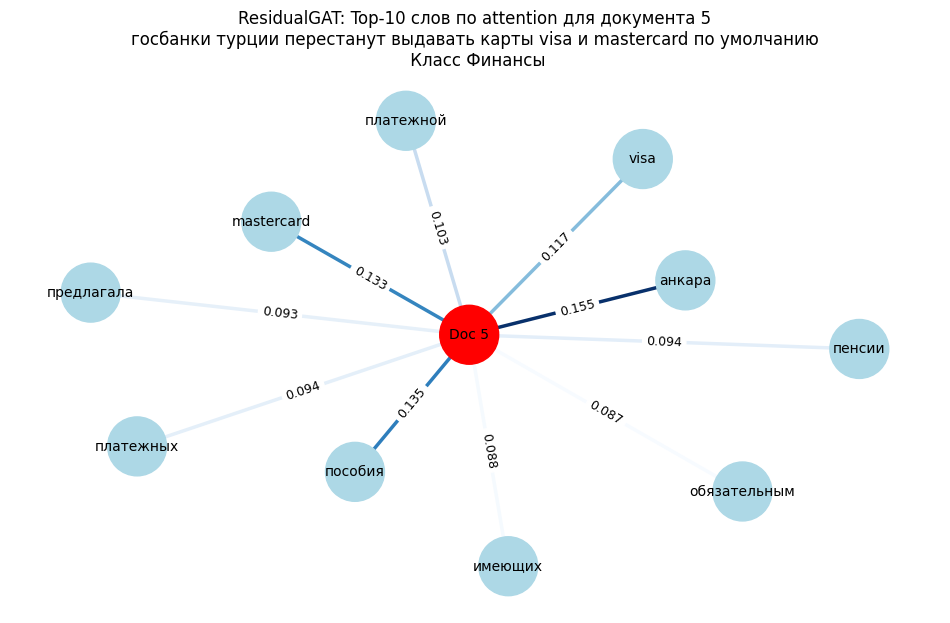

In [55]:
for gatname, gatmodel in gatmodels.items():
    visualize_attention(gatmodel, data_train, vectorizer, 5, gatname)

Визуализация значимости слов для моделей без механизма внимания

In [56]:
def visualize_document_gradient_importance(model, data, vectorizer, doc_id=0, top_k=10, modelname=""):
    model.eval()
    word_offset = data.y.shape[0]
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

    data.x.requires_grad_(True)
    output = model(data)
    pred_label = output[doc_id].argmax()
    loss = output[doc_id, pred_label]
    loss.backward()

    grads = data.x.grad[doc_id]
    grads = grads.cpu().detach().numpy()

    doc_vec = data.x[doc_id].cpu().detach().numpy()
    word_indices = np.where(doc_vec > 0)[0]
    word_scores = grads[word_indices]

    top_indices = word_indices[np.argsort(np.abs(word_scores))[-top_k:]]
    top_words = [(index_to_word[i], grads[i]) for i in top_indices if i in index_to_word]

    G = nx.Graph()
    doc_node_label = f"Doc {doc_id}"
    G.add_node(doc_node_label, color='red')
    edge_labels = {}
    doc_node_label = f"Doc {doc_id}"

    for word, grad in top_words:
        G.add_node(word, color='lightblue')
        G.add_edge(doc_node_label, word, weight=np.abs(grad))
        edge_labels[(doc_node_label, word)] = f"{grad:.3f}"

    pos = nx.spring_layout(G, seed=42)
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]

    plt.figure(figsize=(10, 6))
    edges = nx.draw_networkx_edges(G, pos, edge_color=edge_weights, edge_cmap=plt.cm.Blues, width=2.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)
    labels = nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
    plt.title(f"Gradient-based importance {modelname}\n{df['title'][X_train.index[doc_id]]}\n Класс {df['category'][X_train.index[doc_id]]}")
    plt.axis('off')
    plt.show()

    return top_words

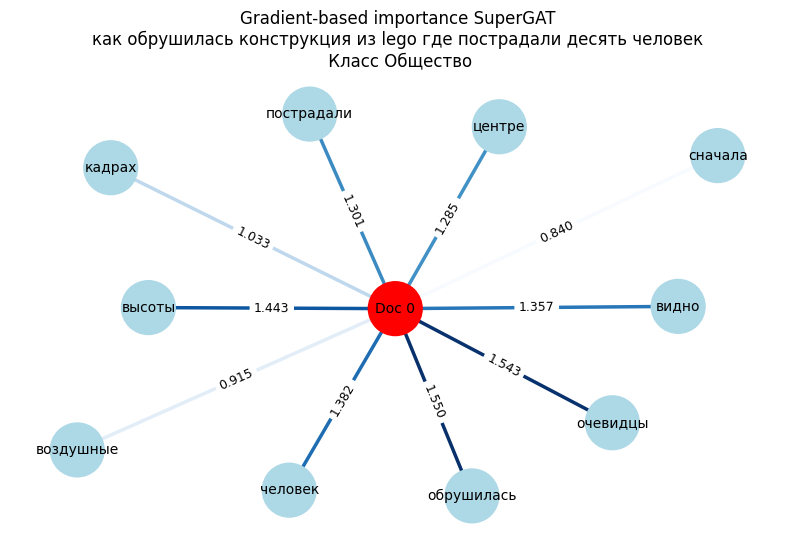

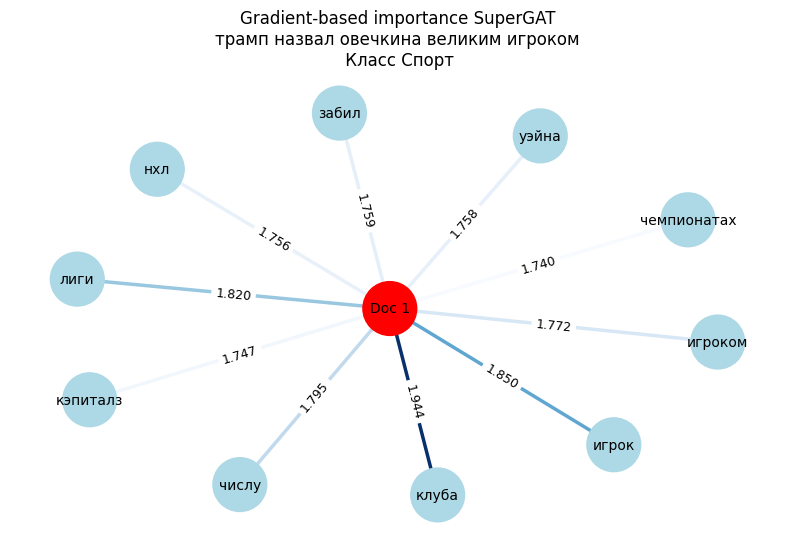

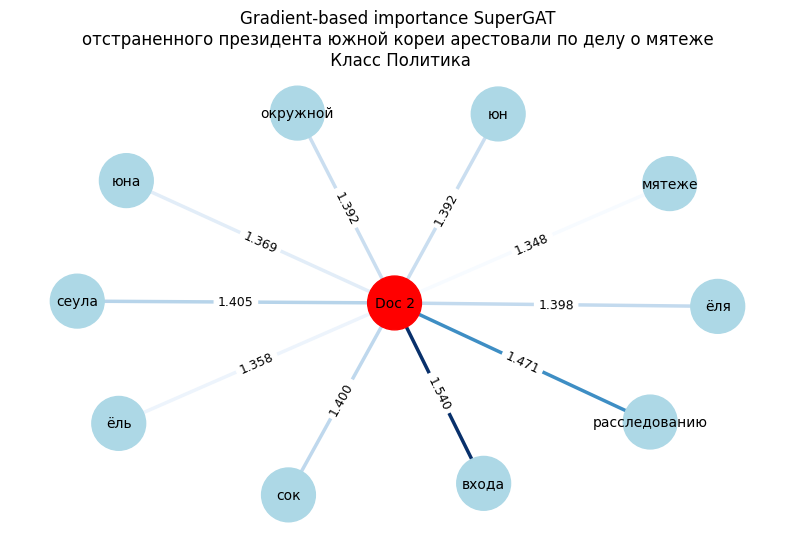

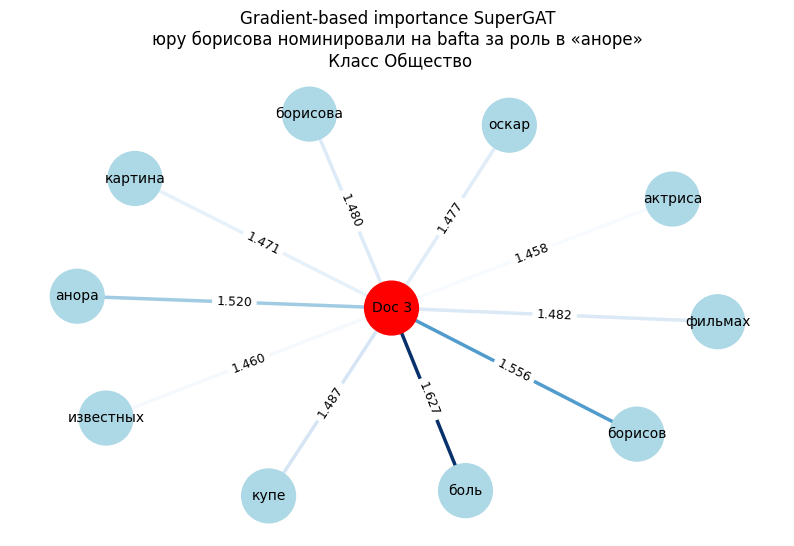

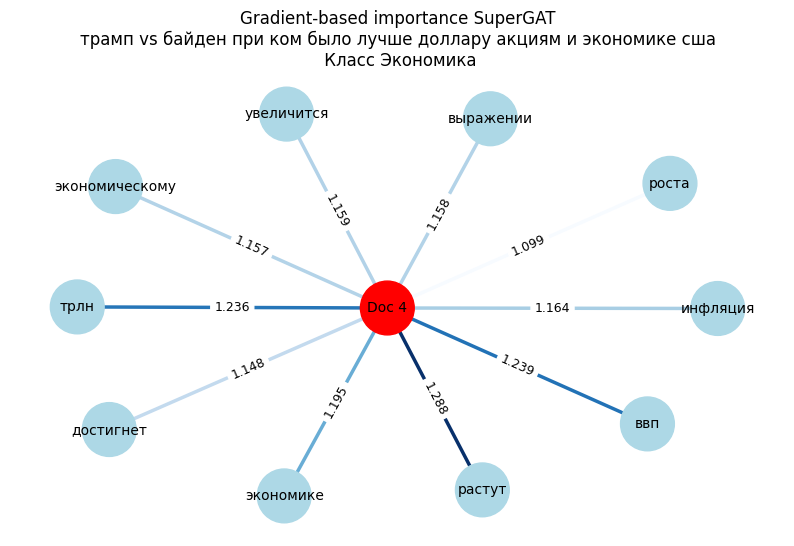

In [57]:
for i in range(5):
  gradmod = visualize_document_gradient_importance(supergat, data_train, vectorizer, i, modelname="SuperGAT")

In [58]:
notgats = {"GCN": modelgcn,
           "SuperGAT": supergat,
           "JKNet": modeljk}

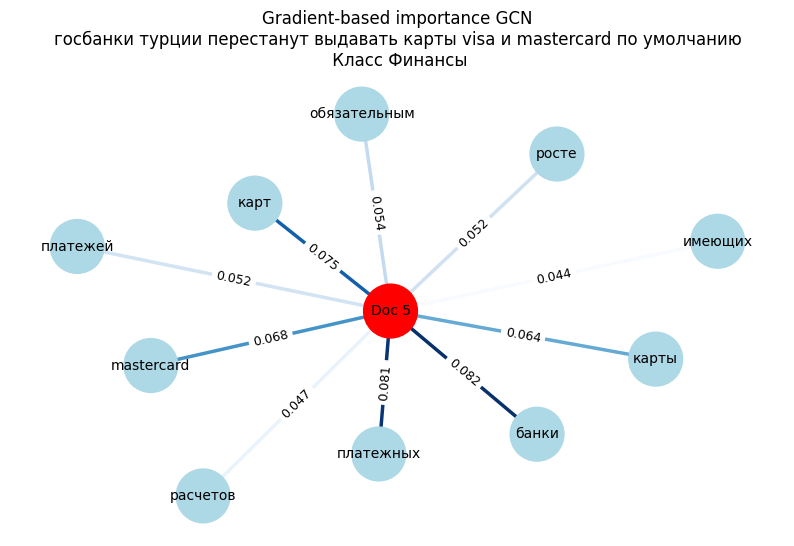

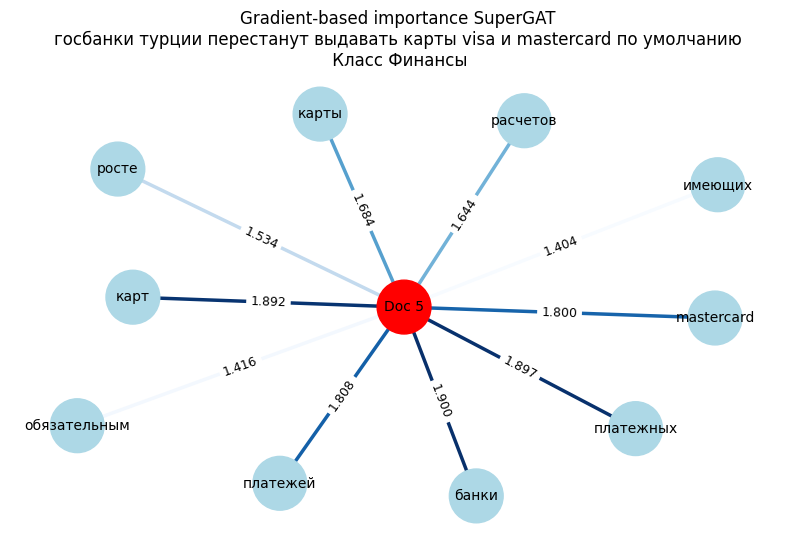

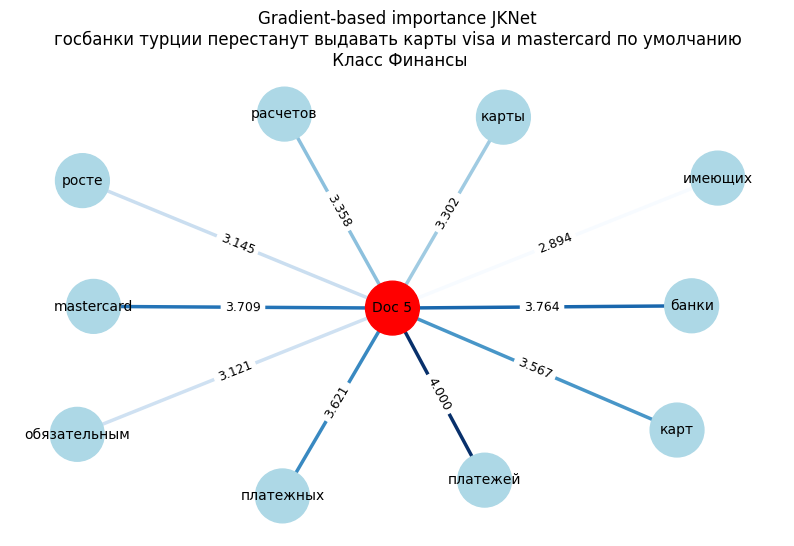

In [59]:
for modname, mod in notgats.items():
  visualize_document_gradient_importance(mod, data_train, vectorizer, 5, modelname=modname)

Визуализация эмбеддингов

In [60]:
def visualize_embeddings(model, data, model_name):
    model.eval()
    with torch.no_grad():
        out = model(data)
        doc_embeddings = out[:len(data.y)].cpu().numpy()
        labels = data.y.cpu().numpy()

    tsne = TSNE(n_components=2, random_state=42)
    reduced = tsne.fit_transform(doc_embeddings)

    used_classes = np.unique(data.y.cpu().numpy())
    class_names = label_encoder.inverse_transform(used_classes)
    colors = [plt.cm.tab10(i) for i in range(len(used_classes))]
    custom_cmap = ListedColormap(colors)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap=custom_cmap, alpha=0.7)
    cbar = plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)))
    cbar.ax.set_yticklabels(label_encoder.classes_)
    cbar.set_label("Класс")

    plt.title(f"{model_name} — визуализация эмбеддингов документов")
    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")
    plt.show()

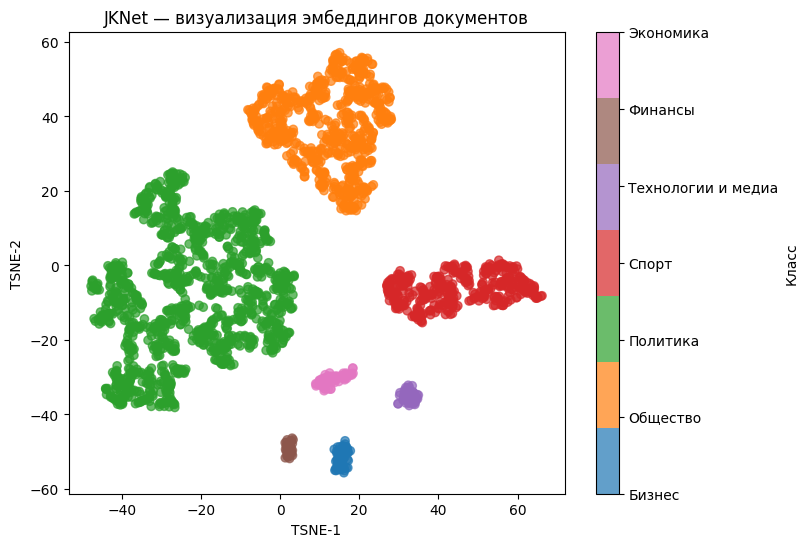

In [61]:
visualize_embeddings(modeljk, data_train, "JKNet")

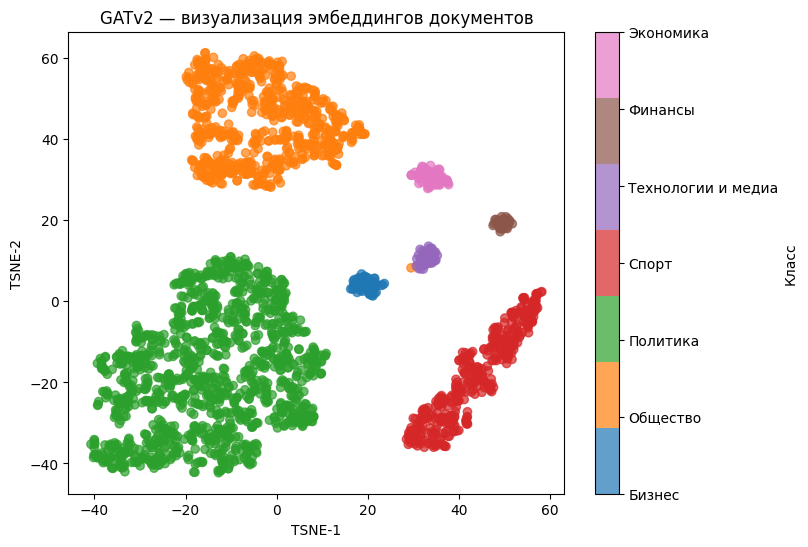

In [62]:
visualize_embeddings(modelgat2, data_train, "GATv2")

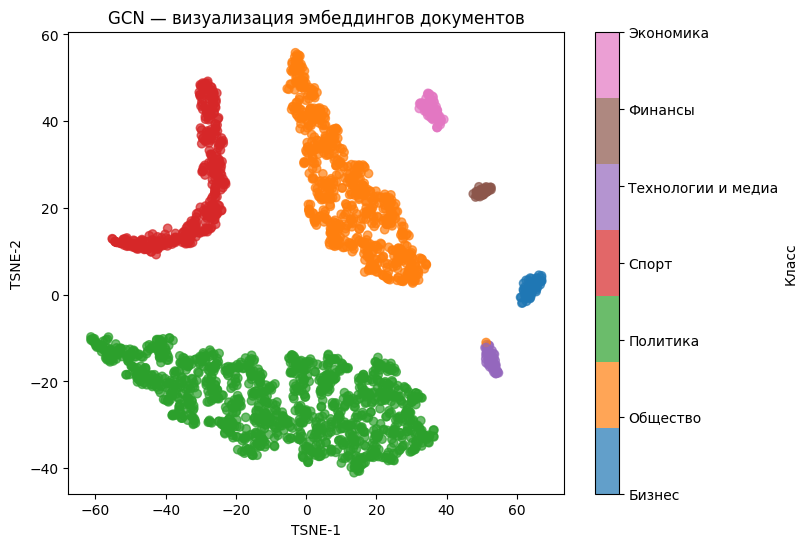

In [63]:
visualize_embeddings(modelgcn, data_train, "GCN")

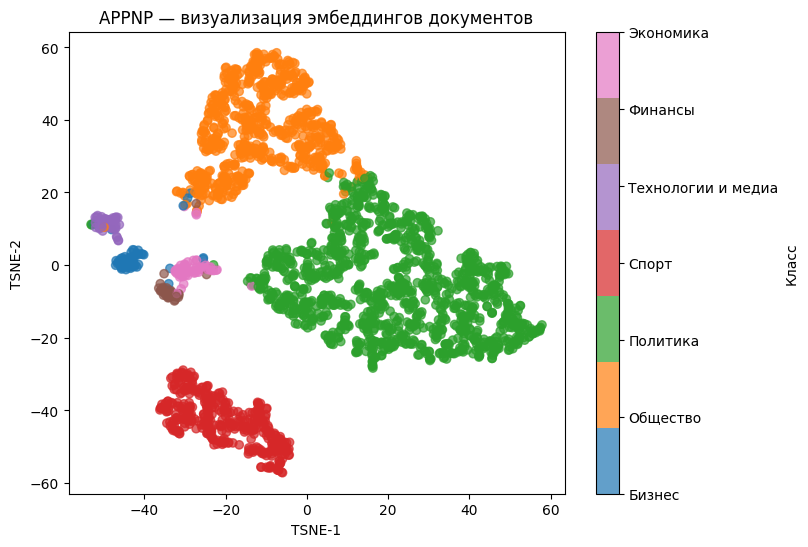

In [64]:
visualize_embeddings(appnp, data_train, "APPNP")

# Метрики

Проверка на устойчивость к удалению узлов

In [65]:
def compare_models_robust(models):
    for name, model in models.items():
        print(f"\nМодель: {name}")
        res = test(model)
        print(f'Test Accuracy = {res[0]:.4f}, Test F1-score = {res[1]:.4f}')
        robustness_advanced(model)

In [66]:
def reindex_edge_index(edge_index, mask):
        idx = torch.arange(mask.size(0))[mask]
        old_to_new = -torch.ones(mask.size(0), dtype=torch.long)
        old_to_new[idx] = torch.arange(idx.size(0))
        new_edge_index = old_to_new[edge_index]
        mask_edges = (new_edge_index[0] >= 0) & (new_edge_index[1] >= 0)
        new_edge_index = new_edge_index[:, mask_edges]
        return new_edge_index

In [67]:
deg = degree(data_test.edge_index[0], num_nodes=data_test.x.size(0))
topk_nodes = deg.topk(10).indices
index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

for node_id in topk_nodes.tolist():
    d = deg[node_id].item()
    if node_id < len(X_test):
        node_type = "Document"
        name = f"doc_{node_id}"
    else:
        node_type = "Word"
        word_idx = node_id - len(X_test)
        name = index_to_word.get(word_idx, f"<UNKNOWN_{word_idx}>")
    print(f"{node_type} [{node_id}]: {name} — degree: {d:.2f}")


Document [334]: doc_334 — degree: 1278.00
Document [404]: doc_404 — degree: 803.00
Document [311]: doc_311 — degree: 726.00
Document [75]: doc_75 — degree: 704.00
Document [486]: doc_486 — degree: 700.00
Document [80]: doc_80 — degree: 652.00
Document [42]: doc_42 — degree: 638.00
Document [284]: doc_284 — degree: 602.00
Document [489]: doc_489 — degree: 580.00
Document [364]: doc_364 — degree: 575.00


In [68]:
def robustness_advanced(model, k=50, num_docs=619):
    model.eval()
    # Степени всех узлов (всего графа)
    deg = degree(data_test.edge_index[0], num_nodes=data_test.x.size(0))
    # Удаление узлов с максимальной степенью (центральные узлы)
    topk_nodes = deg.topk(k).indices
    mask = torch.ones(data_test.x.size(0), dtype=torch.bool)
    mask[topk_nodes] = False

    new_edge_index = reindex_edge_index(data_test.edge_index, mask)
    new_x = data_test.x[mask]
    doc_mask = mask[:num_docs]
    new_y = data_test.y[doc_mask]
    new_test_mask = data_test.test_mask[doc_mask]

    with torch.no_grad():
        newa = Data()
        newa.x, newa.edge_index = new_x, new_edge_index
        out = model(newa)
        pred = out.argmax(dim=1)

    pred_docs = pred[:doc_mask.sum()]
    acc = accuracy_score(new_y[new_test_mask].cpu(), pred_docs[new_test_mask].cpu())
    print(f"Test Accuracy после удаления {k} центральных узлов: {acc:.4f}")

In [69]:
models = {
    "GCN": modelgcn,
    "GAT": modelgatbndo,
    "GATv2": modelgat2,
    "SuperGAT": supergat,
    "ResidualGAT": resgat,
    "JKNet": modeljk,
    'APPNP': appnp
}

In [70]:
compare_models_robust(models)


Модель: GCN
Test Accuracy = 0.8691, Test F1-score = 0.8600
Test Accuracy после удаления 50 центральных узлов: 0.8699

Модель: GAT
Test Accuracy = 0.8691, Test F1-score = 0.8623
Test Accuracy после удаления 50 центральных узлов: 0.8717

Модель: GATv2
Test Accuracy = 0.8659, Test F1-score = 0.8579
Test Accuracy после удаления 50 центральных узлов: 0.8682

Модель: SuperGAT
Test Accuracy = 0.8643, Test F1-score = 0.8571
Test Accuracy после удаления 50 центральных узлов: 0.8647

Модель: ResidualGAT
Test Accuracy = 0.8691, Test F1-score = 0.8612
Test Accuracy после удаления 50 центральных узлов: 0.8699

Модель: JKNet
Test Accuracy = 0.8546, Test F1-score = 0.8498
Test Accuracy после удаления 50 центральных узлов: 0.8576

Модель: APPNP
Test Accuracy = 0.8578, Test F1-score = 0.8456
Test Accuracy после удаления 50 центральных узлов: 0.8664


Метрики

In [71]:
model_names = models.keys()
metrcs = {"Accuracy": [test_gcn[0], test_gat[0], test_gat2[1], test_supergat[1], test_resgat[1], test_jk[1], test_appnp[1]],
          "F1-score": [test_gcn[1], test_gat[1], test_gat2[1], test_supergat[1], test_resgat[1], test_jk[1], test_appnp[1]]}
rmetrics = pd.DataFrame(data=metrcs, index=model_names)

In [72]:
rmetrics.sort_values(['F1-score'], ascending=False)

,Accuracy,F1-score
ResidualGAT,0.861176,0.861176
GCN,0.869144,0.860021
GATv2,0.857929,0.857929
SuperGAT,0.857132,0.857132
GAT,0.862682,0.851530
JKNet,0.849762,0.849762
APPNP,0.845606,0.845606


In [73]:
((rmetrics['Accuracy']+rmetrics['F1-score'])/2).to_frame(name='Mean').sort_values(['Mean'], ascending=False)

,Mean
GCN,0.864582
ResidualGAT,0.861176
GATv2,0.857929
SuperGAT,0.857132
GAT,0.857106
JKNet,0.849762
APPNP,0.845606


In [74]:
conf_matrices = [test_gcn[-2], test_gat[-2], test_gat2[-2], test_supergat[-2], test_resgat[-2], test_jk[-2], test_appnp[-2]]
class_names = label_encoder.classes_.tolist()

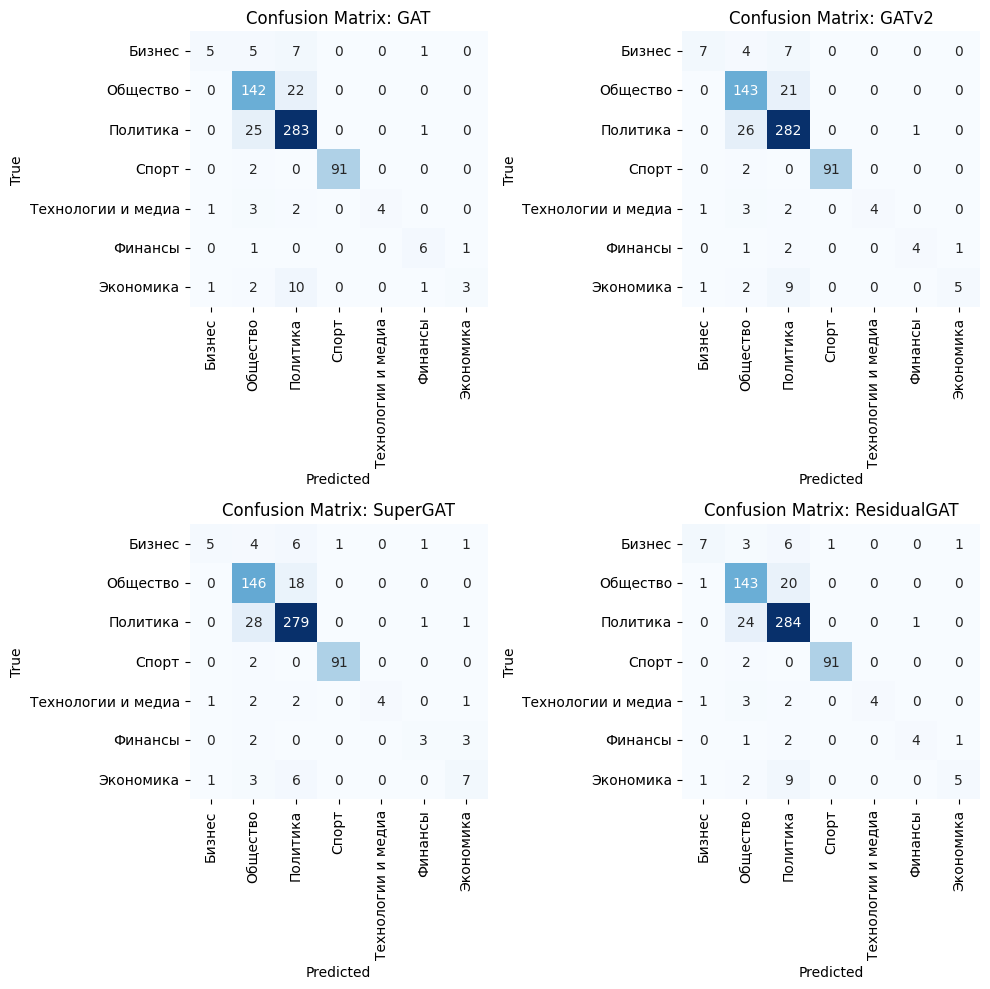

In [75]:
n = len(conf_matrices)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
for i, (cm, name) in enumerate(zip(conf_matrices[1:5], list(model_names)[1:5])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False,
                    xticklabels=class_names, yticklabels=class_names)
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
plt.tight_layout()
plt.show()

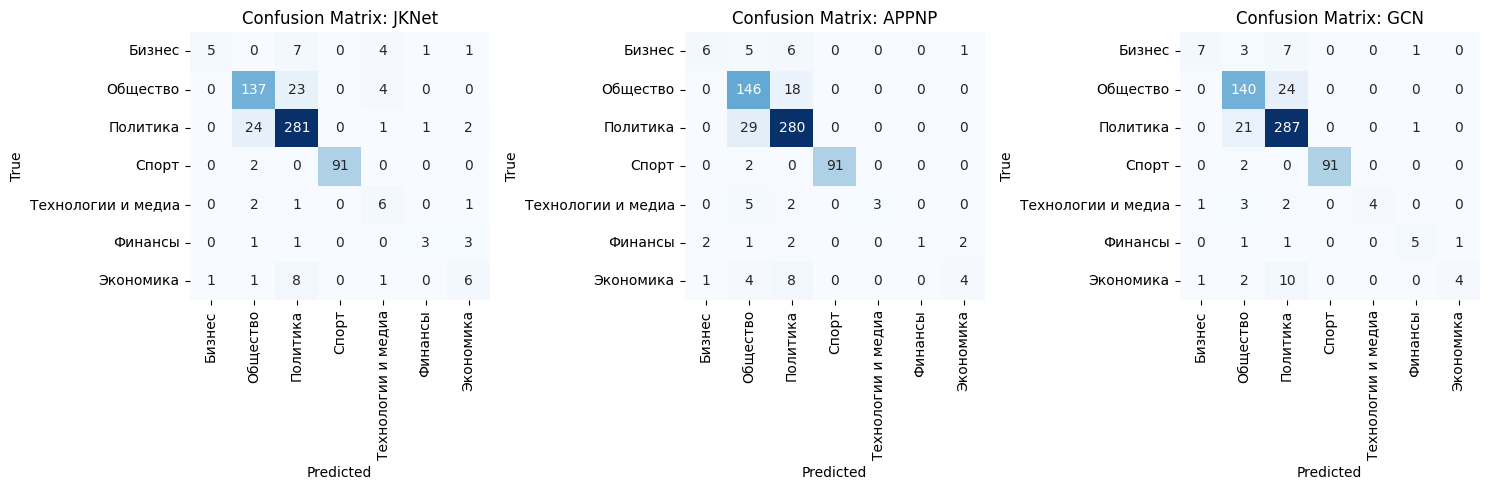

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (cm, name) in enumerate(zip(conf_matrices[5:], list(model_names)[5:])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False,
                    xticklabels=class_names, yticklabels=class_names)
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
sns.heatmap(conf_matrices[0], annot=True, fmt='d', cmap='Blues', ax=axes[2], cbar=False,
                    xticklabels=class_names, yticklabels=class_names)
axes[2].set_title(f'Confusion Matrix: GCN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')
plt.tight_layout()
plt.show()

In [77]:
crs = [test_gcn[-1], test_gat[-1], test_gat2[-1], test_supergat[-1], test_resgat[-1], test_jk[-1], test_appnp[-1]]
for cr, model_name in zip(crs, model_names):
  print('Classification report on ' + model_name + '\n' + cr)

Classification report on GCN
                    precision    recall  f1-score   support

            Бизнес       0.78      0.39      0.52        18
          Общество       0.81      0.85      0.83       164
          Политика       0.87      0.93      0.90       309
             Спорт       1.00      0.98      0.99        93
Технологии и медиа       1.00      0.40      0.57        10
           Финансы       0.71      0.62      0.67         8
         Экономика       0.80      0.24      0.36        17

          accuracy                           0.87       619
         macro avg       0.85      0.63      0.69       619
      weighted avg       0.87      0.87      0.86       619

Classification report on GAT
                    precision    recall  f1-score   support

            Бизнес       0.71      0.28      0.40        18
          Общество       0.79      0.87      0.83       164
          Политика       0.87      0.92      0.89       309
             Спорт       1.00      0.9